# <div align="center"><b>Customer Churn Prediction</b></div>
### <div align="center"><b>TRIO WIBOWO</b></div>
#### 
<div style="text-align: center;">
    <a href="https://www.linkedin.com/in/triowibowo">linkedin.triowibowo</a><br>
    <a href="https://triowibowo21.medium.com">medium.triowibowo21</a>
 <br>
    <a href="https://github.com/triowibowo21">github.triowibowo21</a>
 <br>
    <a href="https://www.kaggle.com/triowibowo28">kaggle.triowibowo21</a>
</div>

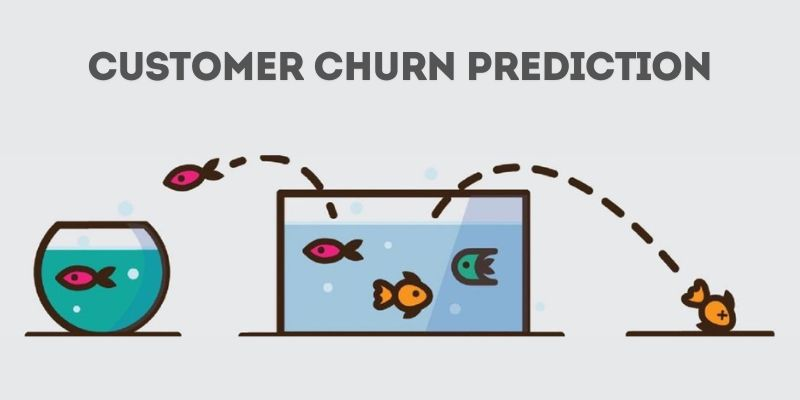

---
<a id='table-of-content'><h1><b>Table of contents</b></h1></a>

- [Introduction](#introduction)
- [Flow](#flow)
- [Business Understanding](#business-understanding)
    - [Description](#description)
    - [Purpose](#purpose)
    - [Metric](#metric)
- [Data Understanding](#data-understanding)
    - [Import Data and Packages](#import-data-and-packages)
    - [Exploratory Data Analysis](#eda)
        - [Data Summary](#data-summary)
        - [Visualization of Categorical Data](#visualization-of-categorical-data)
            - [Customer Churn in Overall](#customer-churn-in-overall)
            - [Customer Churn in Area Code](#customer-churn-in-area-code)
            - [Customer Churn in International Plan](#customer-churn-in-international-plan)
            - [Customer Churn in Voice Mail Plan](#customer-churn-in-voice-mail-plan)
        - [Visualization of Numerical Data](#visualization-of-categorical-data)
            - [Distribution of Numerical Data](#distribution-of-numerical-data)
            - [Density of Numerical Data](#density-of-numerical-data)
            - [Distribution Customer Churn in Total Day Minutes](#distribution-customer-churn-in-total-day-minutes)
            - [Distribution Customer Churn in Total Day Charge](#distribution-customer-churn-in-total-day-charge)
            - [Distribution Customer Churn in Total International Charge](#distribution-customer-churn-in-total-international-charge)
            - [Distribution Customer Churn in Total International Calls](#distribution-customer-churn-in-total-international-calls)
            - [Distribution Customer Churn in Number Vmail Messages](#distribution-customer-churn-in-number-vmail-messages)
            - [Distribution Customer Churn in Number Customer Service Calls](#distribution-customer-churn-in-number-customer-service-calls)
- [Data Preparation](#data-preparation)
    - [Missing Value](#missing-value)
    - [Duplicat Data](#duplicat-data)
    - [Outlier](#outlier)
    - [Features Encoding](#features-encoding)
    - [Dimensionality Reduction](#dimensionality-reduction)
    - [Correlation](#correlation)
    - [Feature Selection](#feature-selection)
    - [Standardization](#standardization)
    - [Train Test Split](#train-test-split)
- [Modeling & Evaluation](#modeling-&-evaluation)
    - [Logistic Regression](#logistic-regression)
    - [KNN](#knn)
    - [Decision Tree](#decision-tree)
    - [Random Forest](#random-forest)
    - [Support Vector Machines](#support-vector-machines)
- [Result](#result)
- [Model Interpretation](#model-interpretation)
- [Submission](#submission)
- [Conclusion](#conclusion)
- [Recommendation](#recommendation)

---
<a id='introduction'><h1><b>Introduction</b></h1></a>

[<h5>back to contents</h5>](#table-of-content)

The development of telecommunications industry is very fast. This can see from the behavior people who use internert for communicate. This behavior case many telecommunicateions companies to increase their internet services provider which can lead to competition between provider. Customer have right to choose appropriate provider can switch from pervious provider which is the phenomenon known as **Customer Churn**. This phenomenon can make to reduce revenue for telecommunications companies and is therefore important to address.

In this case, participants are provided with a training dataset containing 4250 samples. Each sample consists of 19 features and one boolean target variable *"churn"*, which indicates whether the customer will churn.

---
<div id='flow'><h1><b>Flow</b></h1></div>

[<h5>back to contents</h5>](#table-of-content)

##### **CRISP-DM Process Flow**
The CRISP-DM (Cross Industry Standard Process for Data Mining) methodology is a robust and comprehensive data mining process model that outlines six major phases:

1. Business Understanding
2. Data Understanding
3. Data Preparation**
4. Modeling
5. Evaluation
6. Deployment

##### **CRISP-DM Process Flow Diagram**
<div style="text-align: center;">
<img src="https://upload.wikimedia.org/wikipedia/commons/b/b9/CRISP-DM_Process_Diagram.png" width=400px height=400px />
</div>

---
<div id='business-understanding'><h1><b>Business understanding</b></h1></div>

[<h5>back to contents</h5>](#table-of-content)

<div id='description'><h3><b>Description</b></h3></div>

Customer churn refers to the phenomenon where customers cease conducting business with a company or terminate their subscription to a service. It is a critical metric for businesses, particularly in industries such as telecommunications, subscription services, and financial services, where long-term customer relationships are essential. Understanding and managing customer churn is vital for maintaining revenue and achieving sustainable growth.

<div id='purpose'><h3><b>Purpose</b></h3></div>

Hence, this case focuses on predicting customer churn. It is important for companies to know this prediction so they can map out business strategies to retain customers. Accurate churn prediction is crucial for businesses to maintain customer satisfaction, retain customers, and minimize revenue loss.

<div id='metric'><h3><b>Metric</b></h3></div>

Metric for this case is the optimal model with high accuracy to predict customer churn, defined as follows:

$$
\text{Accuracy = } \frac{\text{Number of correct predictions}}{\text{Number of total test sample}}
$$

---
<div id='data-understanding'><h1><b>Data Understanding</b></h1></div>

[<h5>back to contents</h5>](#table-of-content)

<div id='import-data-and-packages'><h3><b>Import Data and Packages</b></h3></div>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
df = pd.read_csv('/kaggle/input/customer-churn-prediction-2020/train.csv')
df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

**Columns (variabels) information :**
- Categorical data
    1. state = 2-letter code of the US state of customer residence.
    2. area_code = Area with 3 digit code.
    1. international_plan (Yes,No) = The customer has international plan.
    2. voice_mail_plan (Yes,No) = The customer has voice mail plan.
    3. churn (Yes,No) = Customer churn - target variable.
- Numerical data
    1. account_length = Number of months the customer has been with the current telco provider
    2. number_vmail_messages = Number of voice-mail messages.
    3. total_day_minutes = Total minutes of day calls.
    4. total_day_calls = Total number of day calls.
    5. total_day_charge = Total charge of day calls.
    6. total_eve_minutes = Total minutes of evening calls.
    7. total_eve_calls = Total number of evening calls.
    8. total_eve_charge = Total charge of evening calls.
    9. total_night_minutes = Total minutes of night calls.
    10. total_night_calls = Total number of night calls.
    11. total_night_charge = Total charge of night calls.
    12. total_intl_minutes = Total minutes of international calls.
    13. total_intl_calls = Total number of international calls.
    14. total_intl_charge = Total charge of international calls.
    15. number_customer_service_calls = Number of calls to customer service

In [4]:
# Information about number of row and column (variabel)

print('The number of row in the data is :', df.shape[0])
print('The number of columns (variabel) in the data is :', df.shape[1])

The number of row in the data is : 4250
The number of columns (variabel) in the data is : 20


<div id='eda'><h3><b>Exploratory Data Analysis</b></h3></div>

In [5]:
def pie_label(pct, x):
    value = int(pct / 100.*np.sum(x))
    return '{:d}\n({:.0f}%)'.format(value, pct)

In [6]:
def stacking_bar_label(data):
    for idx in data.index:
        start = 0
        for col in data.columns:
            y = data.loc[idx, col]
            value = data.loc[idx, col]
            total = data.loc[idx, :].sum()
            ax.text(
                x=idx,
                y=(start + y / 2) * 0.95,
                s=f'{round(100 * value / total, 1)}%',
                fontsize=15,
                ha='right',
                color='black',
                weight='bold'
                )
            start += y

In [7]:
def save_division(numerator, denumerator):
    if numerator == 0  and denumerator == 0:
        return 0
    elif denumerator == 0:
        raise ValueError("Division by zero is not allowed") 
    else:
        return numerator/denumerator

In [8]:
class extract_data():
    def __init__(self, chart, interval):
        self.chart = chart
        self.bin_edges = self.chart.patches
        self.interval = interval
        self.x_data = [(bin_edge.get_x() + bin_edge.get_width()/2) for bin_edge in self.bin_edges]
        self.y_data = [bin_edge.get_height() for bin_edge in self.bin_edges]
        self.x_interval = np.array(self.x_data[:interval])
        self.y_churn = np.array(self.y_data[:interval])
        self.y_total = np.array(self.y_data[:interval]) + np.array(self.y_data[interval:])
    
    def hist_label(self):
        for c, d, e in zip(self.x_interval, self.y_churn, self.y_total):
            self.chart.text(
                x=c
                , y=d
                , s=f'{round(100* save_division(d, e))}%'
                , fontsize=12
                , ha='left'
                , va='center'
                , color='darkred'
                , weight='bold'
            )

    def line_label(self):
        for x, y in zip(self.x_interval, self.y_total):
            self.chart.text(
                x=x
                , y=y
                , s='{:.0f}'.format(y)
                , fontsize=12
                , ha='right'
                , va='baseline'
                , color='black'
                , weight='bold'
            )

In [9]:
color_list = [
        'lightcoral'
        ,'lightseagreen'
        , 'springgreen'
        , 'deepskyblue'
        , 'gray'
        , 'violet'
        , 'brown'
        , 'lightcoral'
        , 'deeppink'
        , 'peru'
        , 'purple'
        , 'cyan'
        , 'forestgreen'
        , 'crimson'
        , 'magenta'
        ]

<div id='data-summary'><h3><b>Data Summary</b></h3></div>

In [10]:
# Numerical Data Summary

df.describe()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000
mean,100.236235,7.631765,180.259600,99.907294,30.644682,200.173906,100.176471,17.015012,200.527882,99.839529,9.023892,10.256071,4.426353,2.769654,1.559059
std,39.698401,13.439882,54.012373,19.850817,9.182096,50.249518,19.908591,4.271212,50.353548,20.093220,2.265922,2.760102,2.463069,0.745204,1.311434
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,0.000000,143.325000,87.000000,24.365000,165.925000,87.000000,14.102500,167.225000,86.000000,7.522500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,0.000000,180.450000,100.000000,30.680000,200.700000,100.000000,17.060000,200.450000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,16.000000,216.200000,113.000000,36.750000,233.775000,114.000000,19.867500,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000
max,243.000000,52.000000,351.500000,165.000000,59.760000,359.300000,170.000000,30.540000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [11]:
# Categorical Data Summary

df.describe(include='O')

,state,area_code,international_plan,voice_mail_plan,churn
count,4250,4250,4250,4250,4250
unique,51,3,2,2,2
top,WV,area_code_415,no,no,no
freq,139,2108,3854,3138,3652


<div id='visualization-of-categorical-data'><h3><b>Visualization of Categorical Data</b></h3></div>

<div id='customer-churn-in-overall'><h4><b>Customer Churn in Overall</b></h4></div>

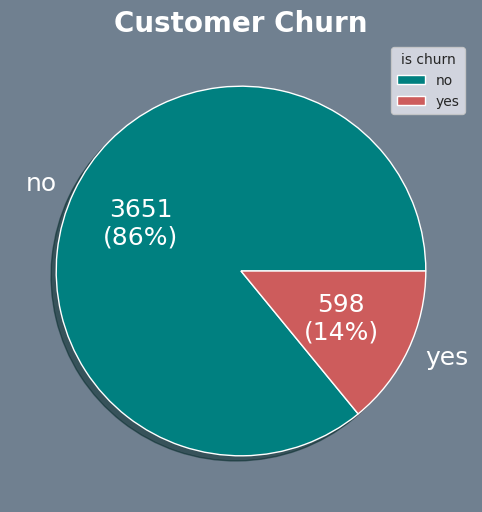

In [12]:
plt.figure(figsize=(9,6), facecolor='slategray')
churn = df['churn'].value_counts()
colors = ['teal', 'indianred']
sns.set_style('darkgrid')
plt.pie(churn, labels=churn.index, autopct=lambda pct: pie_label(pct, churn), colors=colors, shadow=True, textprops=dict(color='white', fontsize=18))
plt.title("Customer Churn", color='white', loc='center', weight='bold', fontsize=20)
plt.legend(title='is churn')
plt.show()

<div id='customer-churn-in-area-code'><h4><b>Customer Churn in Area Code</b></h4></div>

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


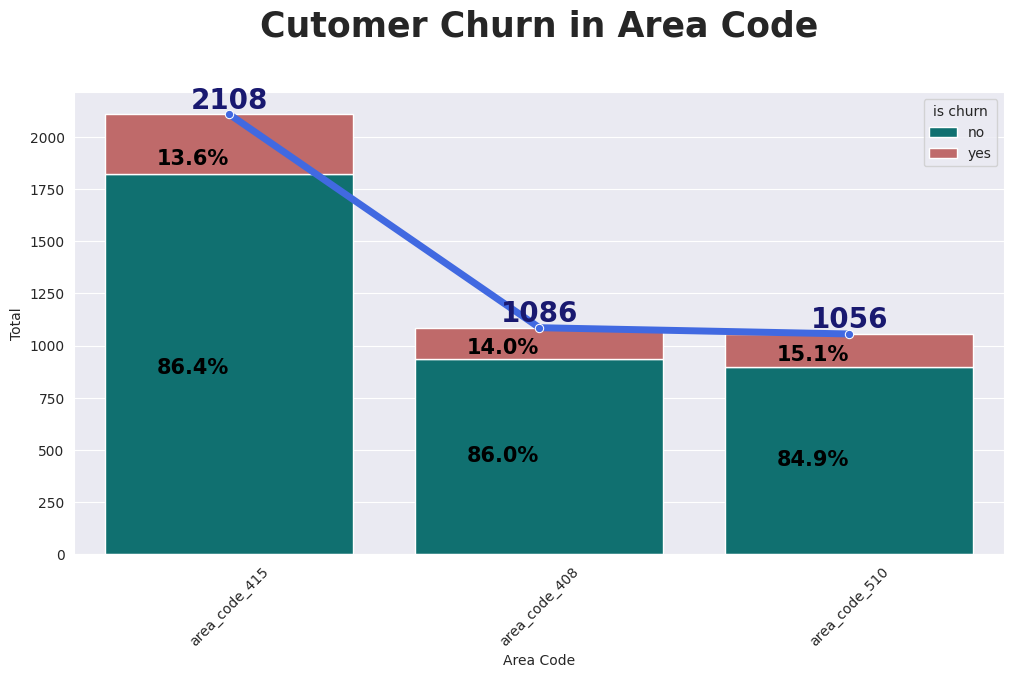

In [13]:
line_plot = df['area_code'].value_counts()
area = df.groupby(['area_code','churn'])['state'].count().reset_index()
area = area.pivot_table(index='area_code', columns='churn', values='state').sort_values(by='no', ascending=False)

fig, ax = plt.subplots(figsize=(12,6))
sns.lineplot(data=line_plot, marker='o', sort=False, color='royalblue', estimator=None, linewidth=5, ax=ax)
sns.barplot(x =area.index, y =area['no'], color = 'teal', label='no', ax=ax)
sns.barplot(x =area.index, y =area['yes'], color = 'indianred', label='yes', bottom=area['no'], ax=ax)

stacking_bar_label(area)
ax.bar_label(ax.containers[1], fontsize=20, weight='bold', color='midnightblue')
ax.legend(title='is churn')
ax.set_xlabel('Area Code')
ax.set_ylabel('Total')
ax.set_title('Cutomer Churn in Area Code', fontsize=25, pad=40, weight='bold')
plt.xticks(rotation=45)
plt.show()

`area_code_415` is the area with the largest number of customers (2108) and this area become the smallest % customer churn (13.6%) when compared to other areas.

<div id='customer-churn-in-international-plan'><h4><b>Customer Churn in International Plan</b></h4></div>

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


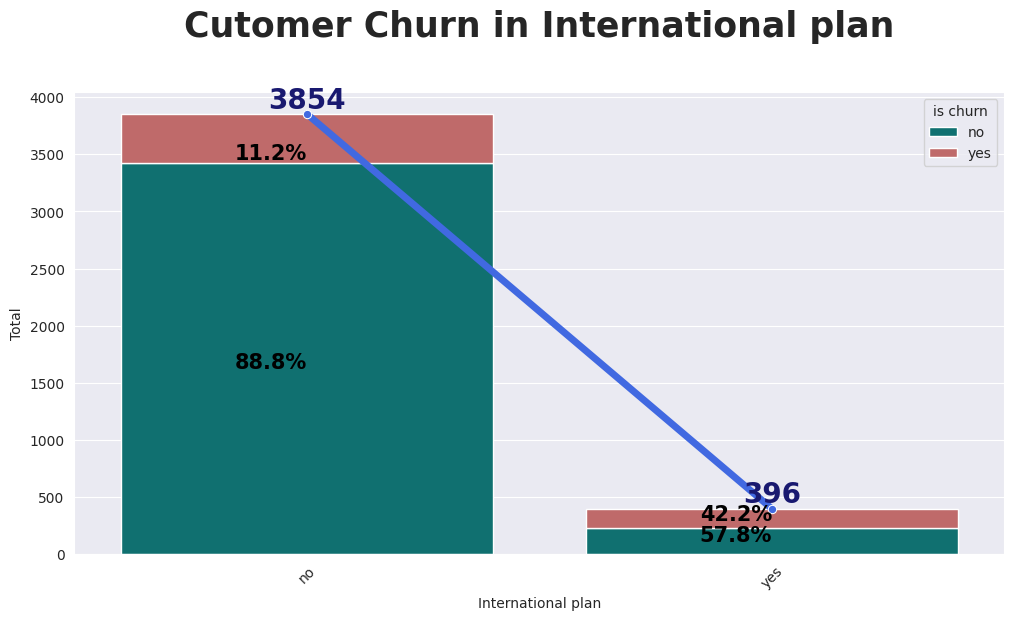

In [14]:
line_plot = df['international_plan'].value_counts()
international_plan = df.groupby(['international_plan','churn'])['state'].count().reset_index()
international_plan = international_plan.pivot_table(index='international_plan', columns='churn', values='state').sort_values(by='no', ascending=False)

fig, ax = plt.subplots(figsize=(12,6))
sns.lineplot(data=line_plot, marker='o', sort=False, color='royalblue', estimator=None, linewidth=5, ax=ax)
sns.barplot(x =international_plan.index, y =international_plan['no'], color = 'teal', label='no', ax=ax)
sns.barplot(x =international_plan.index, y =international_plan['yes'], color = 'indianred', label='yes', bottom=international_plan['no'], ax=ax)

stacking_bar_label(international_plan)
ax.bar_label(ax.containers[1], fontsize=20, weight='bold', color='midnightblue')
ax.legend(title='is churn')
ax.set_xlabel('International plan')
ax.set_ylabel('Total')
ax.set_title('Cutomer Churn in International plan', fontsize=25, pad=40, weight='bold')
plt.xticks(rotation=45)
plt.show()

Customer which have `international_plan` tend to churn more with percentage 42.2%. It's very different when compared to customer which don't have `international_plan` with most of them still stay use the provider.

<div id='customer-churn-in-voice-mail-plan'><h4><b>Customer Churn in Voice Mail Plan</b></h4></div>

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


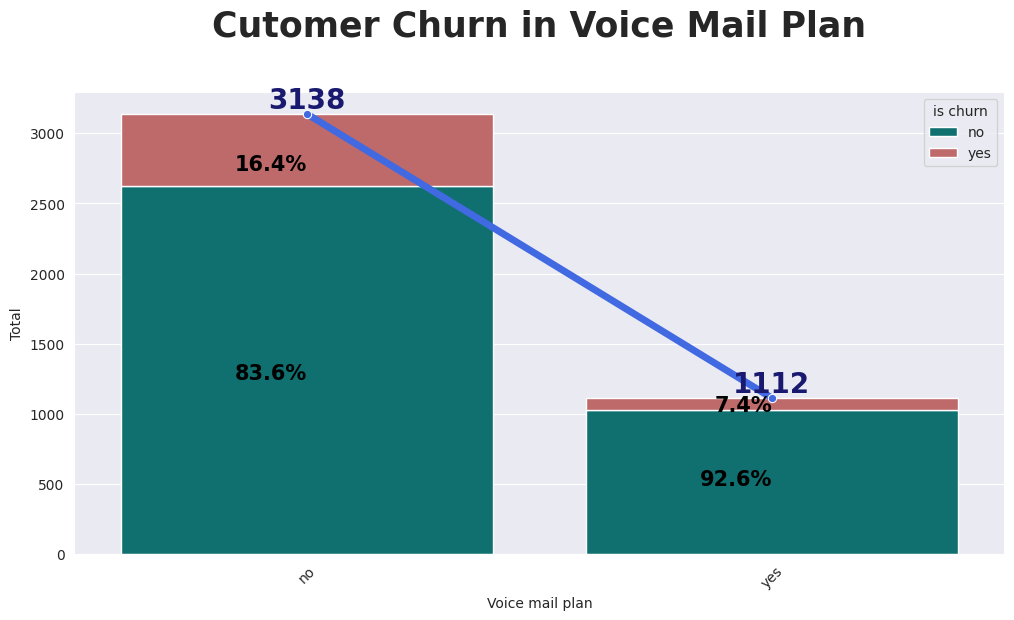

In [15]:
line_plot = df['voice_mail_plan'].value_counts()
voice_mail_plan = df.groupby(['voice_mail_plan','churn'])['state'].count().reset_index()
voice_mail_plan = voice_mail_plan.pivot_table(index='voice_mail_plan', columns='churn', values='state').sort_values(by='no', ascending=False)

fig, ax = plt.subplots(figsize=(12,6))
sns.lineplot(data=line_plot, marker='o', sort=False, color='royalblue', estimator=None, linewidth=5, ax=ax)
sns.barplot(x =voice_mail_plan.index, y =voice_mail_plan['no'], color = 'teal', label='no', ax=ax)
sns.barplot(x =voice_mail_plan.index, y =voice_mail_plan['yes'], color = 'indianred', label='yes', bottom=voice_mail_plan['no'], ax=ax)

stacking_bar_label(voice_mail_plan)
ax.bar_label(ax.containers[1], fontsize=20, weight='bold', color='midnightblue')
ax.legend(title='is churn')
ax.set_xlabel('Voice mail plan')
ax.set_ylabel('Total')
ax.set_title('Cutomer Churn in Voice Mail Plan', fontsize=25, pad=40, weight='bold')
plt.xticks(rotation=45)
plt.show()

For customer which have `voice_mail_plan` (yes), many of them will be stay (92.6%), while customer which don't have `voice_mail_plan` (no) have large percentage churn in 16.4%.

<div id='visualization-of-numerical-data'><h3><b>Visualization of Numerical Data</b></h3></div>

<div id='distribution-of-numerical-data'><h4><b>Distribution of Numerical Data</b></h4></div>

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

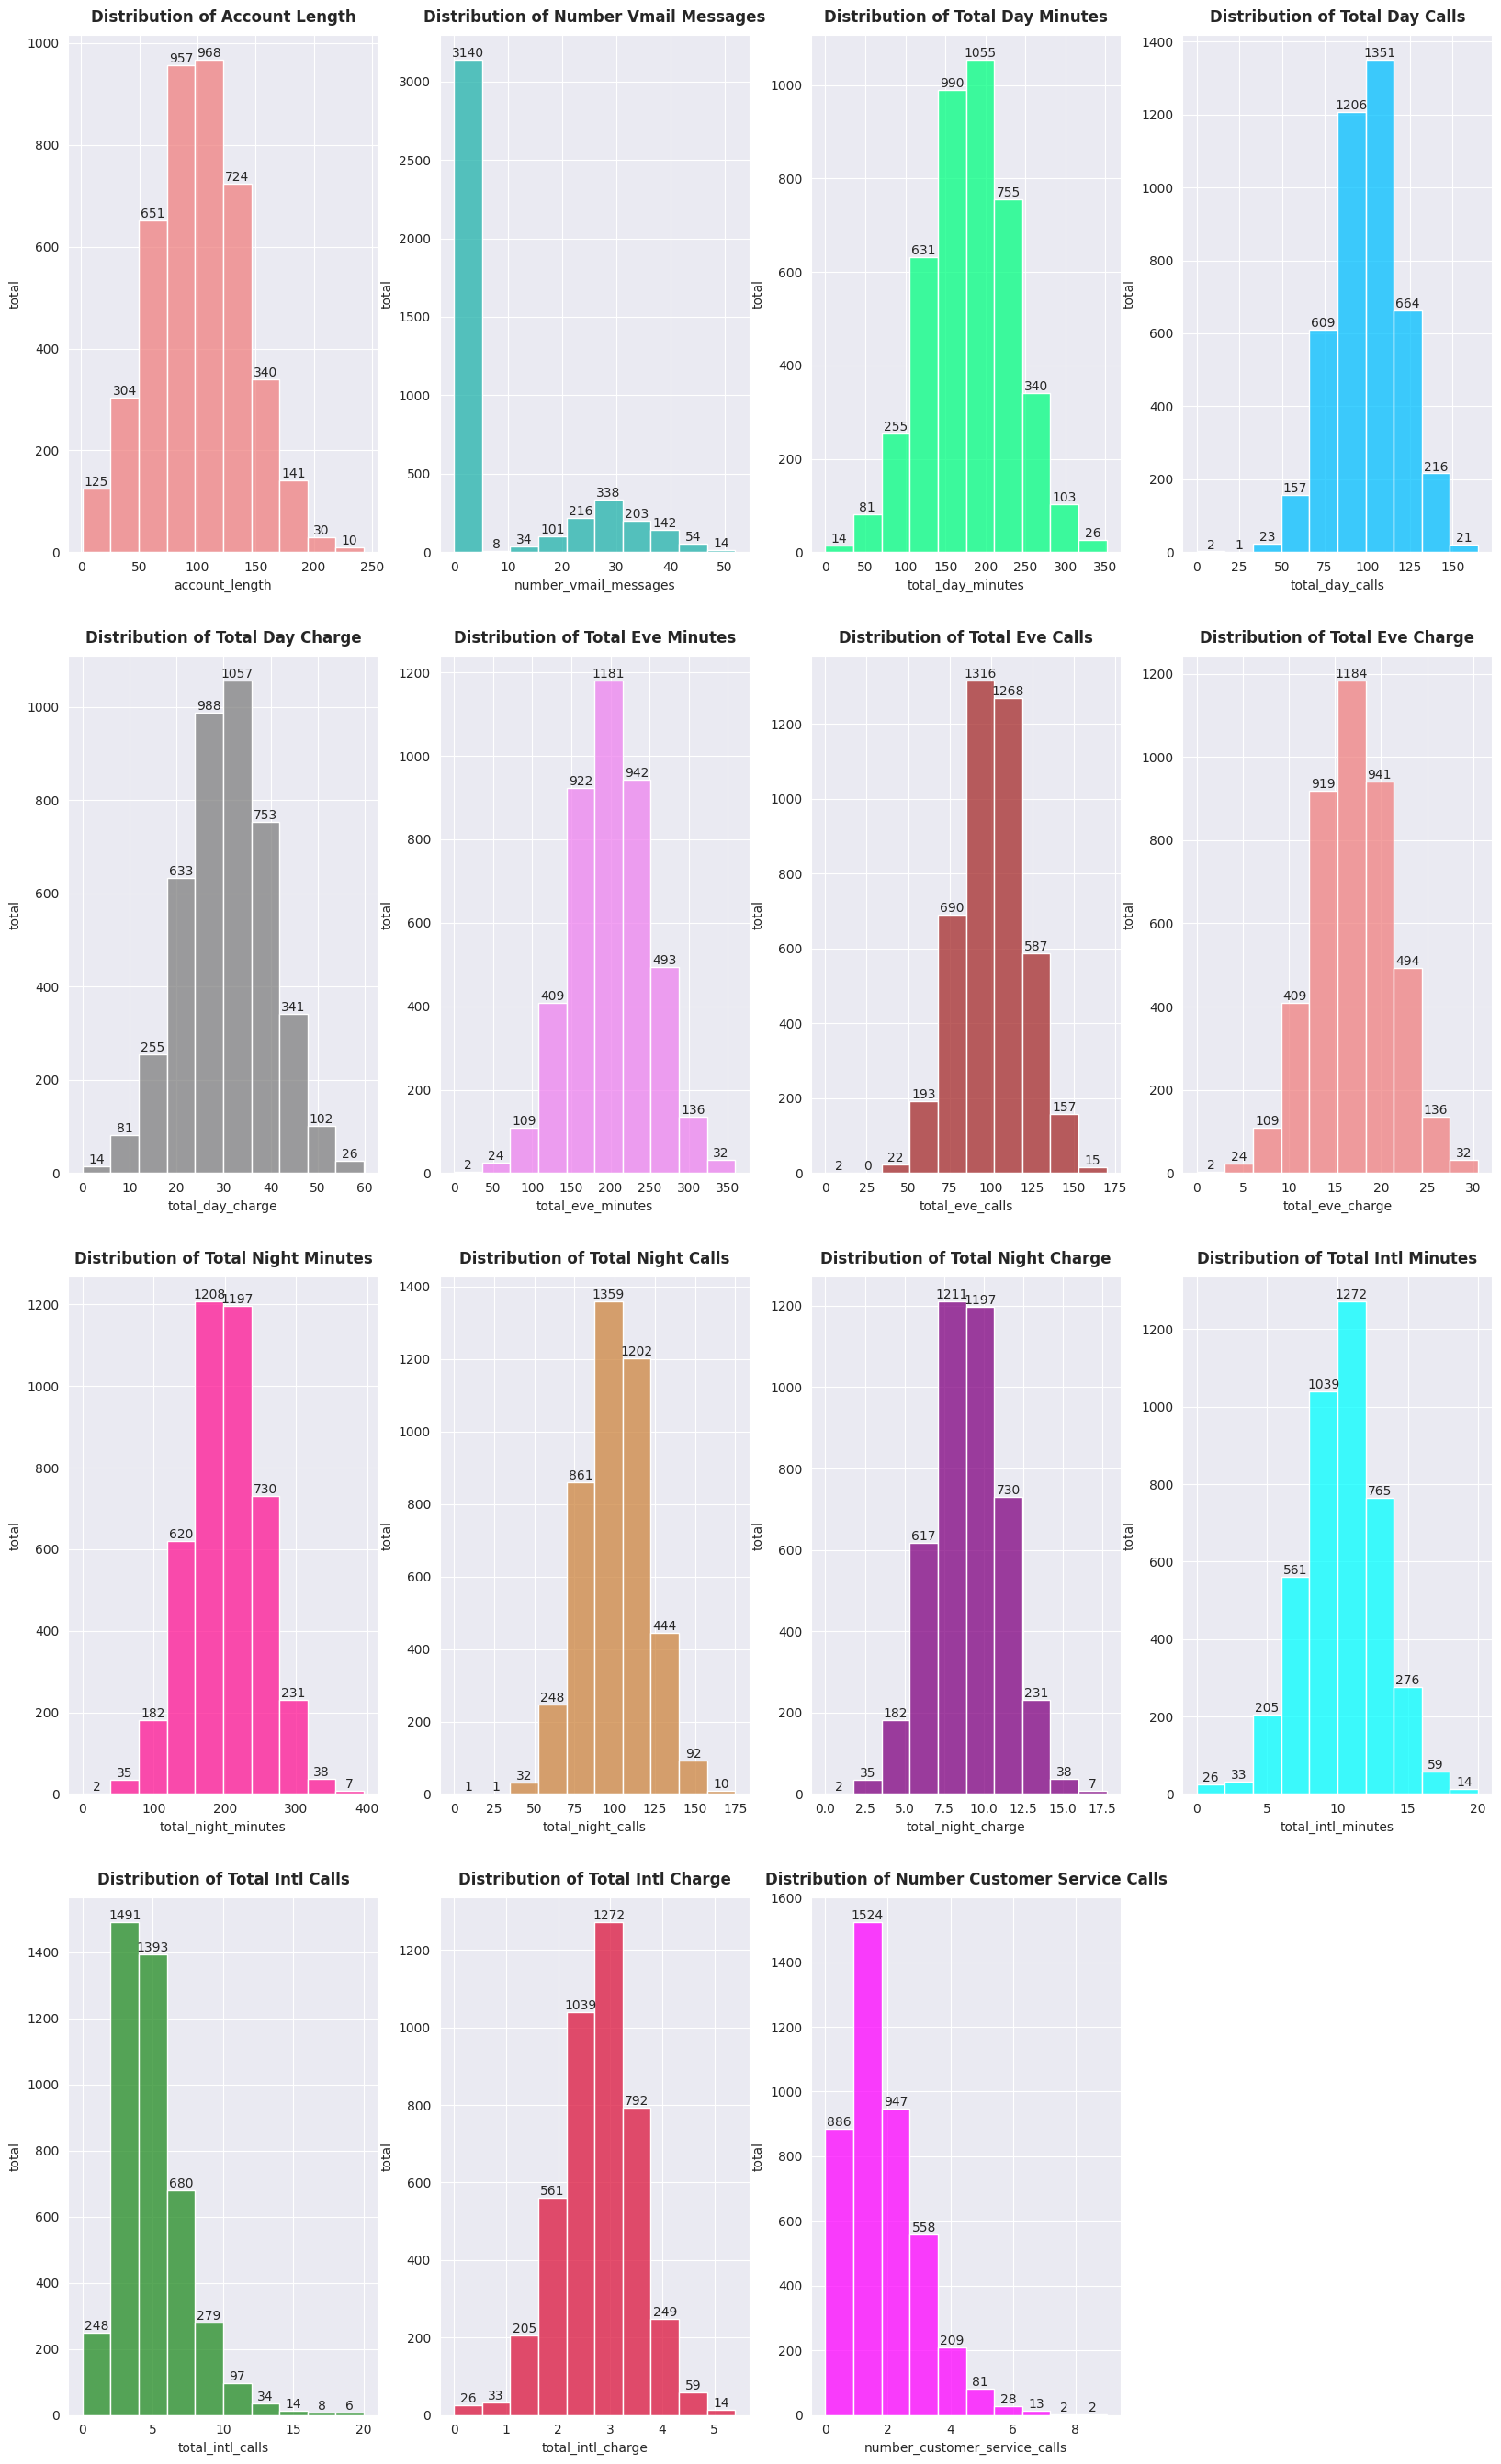

In [16]:
num_column = df.describe().columns.values
fig = plt.figure(figsize=[20,60])
for i ,col in enumerate(num_column):
    ax = fig.add_subplot(7, 4, i+1)
    ax = sns.histplot(df[col], bins=10, color=color_list[i])
    ax.bar_label(ax.containers[0], fontsize=10)
    ax.set_xlabel(col, fontsize=10)
    ax.set_ylabel('total', fontsize=10)
    ax.tick_params(labelsize=10)
    title = re.sub('_', ' ', col.title())
    ax.set_title('Distribution of {}'.format(title), fontweight='bold', fontsize=12, pad=10)


Based on the visualization result, almost all the numerical columns (variabel) are normal distribution or the majority of the data around in mean, median, mode value such as :  
- `account_length`, 
- `total_day_minutes`,
- `total_day_calls`, 
- `total_day_charge`, 
- `total_eve_minutes`, 
- `total_eve_calls`, 
- `total_eve_charge`, 
- `total_night_minutes`, 
- `total_night_calls`, 
- `total_night_charge`, 
- `total_intl_minutes`, 
- `total_intl_charge`.

Meanwhile for other columns (variabel) such as :
- `number_vmail_messages`, 
- `total_intl_calls`, 
- `number_customer_service_calls`. 
<br><br>
All data is distributed to right (positively skewed distribution) where the value of mean > median > mode

<div id='density-of-numerical-data'><h4><b>Density of Numerical Data</b></h4></div>

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

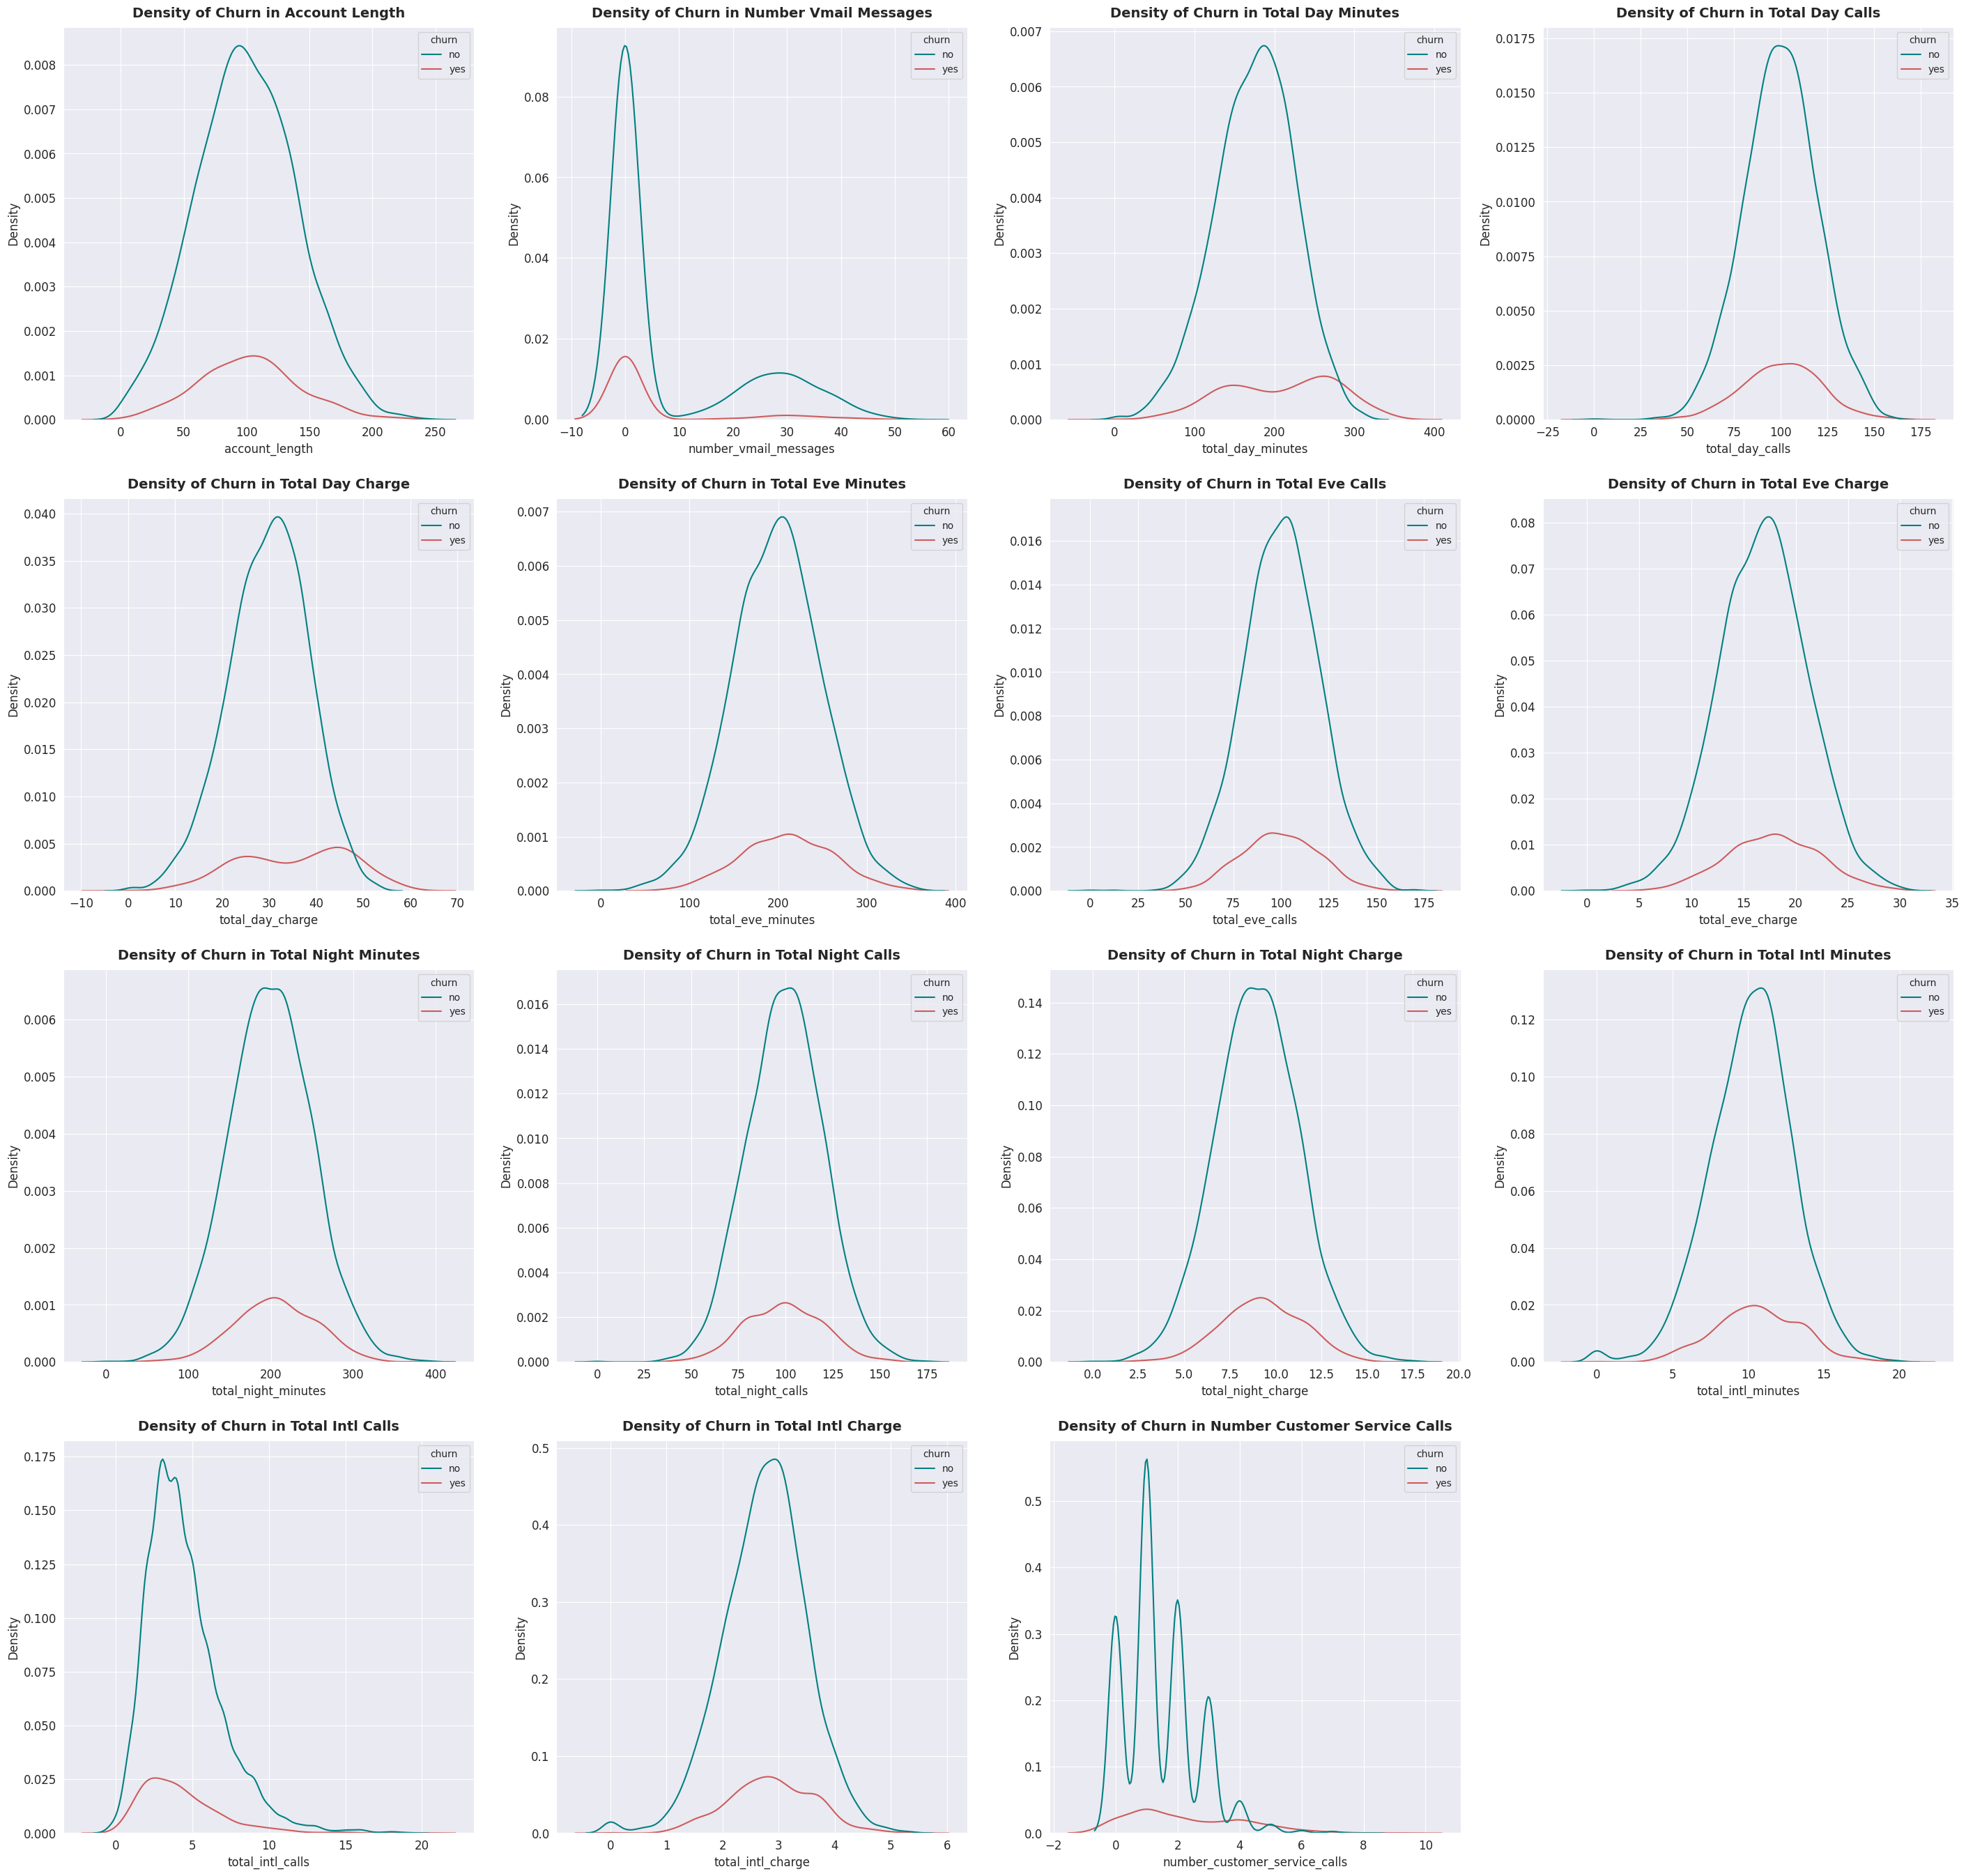

In [17]:
fig = plt.figure(figsize=[35,60])
for i ,col in enumerate(num_column):
    ax = fig.add_subplot(7, 4, i+1)
    ax = sns.kdeplot(data = df, x=col, hue='churn',  palette=['teal', 'indianred'])
    ax.set_xlabel(col, fontsize=12)
    ax.set_ylabel('Density', fontsize=12)
    ax.tick_params(labelsize=12)
    title = re.sub('_', ' ', col.title())
    ax.set_title('Density of Churn in {}'.format(title), fontweight='bold', fontsize=14, pad=10)

In bivariat analysis, it can be see that all the numerical columns (variabel), the density of customer churn are much lower (most of them is stay use the provider), but in several columns (variabel) there are condition where the trend of density customer churn with higher, such as : 
- `total_day_minutes`, 
- `total_day_charge`, and 
- `number_customer_service_calls` whihch have fluctuating trend.

<div id='distribution-customer-churn-in-total-day-minutes'><h4><b>Distribution Customer Churn in Total Day Minutes</b></h4></div>

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

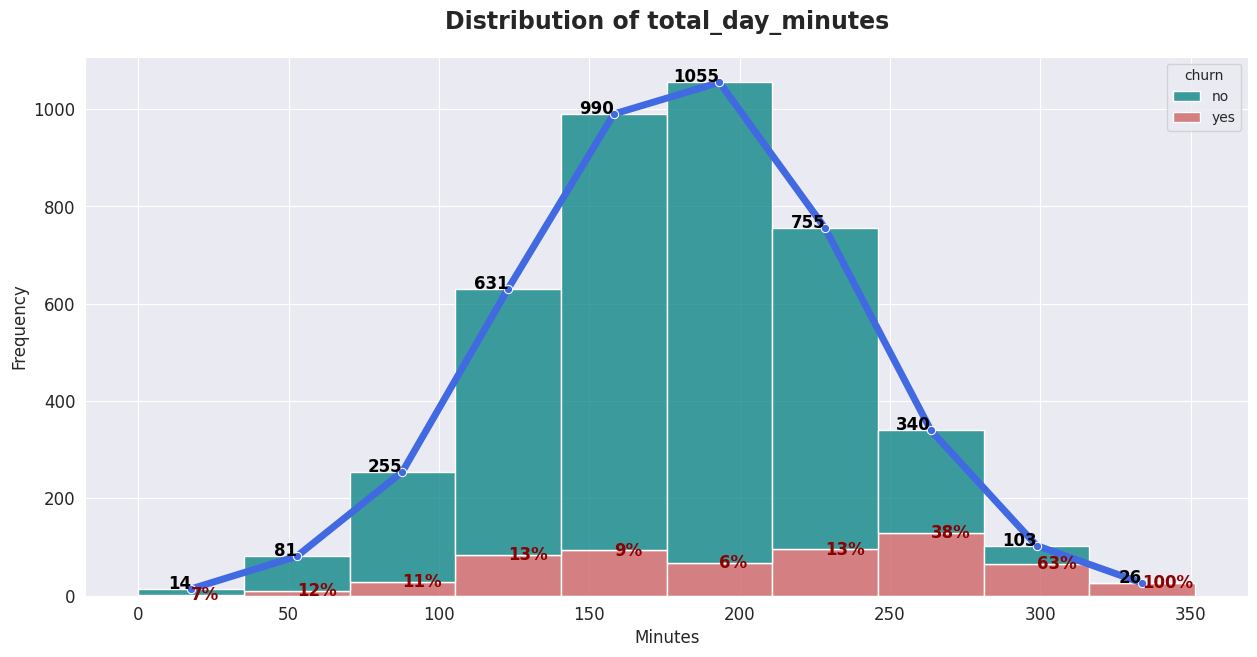

In [18]:
n = 10
target_variabel = ['total_day_minutes', 'churn']

fig, ax1 = plt.subplots(figsize=(15,7))
sns.histplot(data=df, x=target_variabel[0], bins=n, stat='count', hue=target_variabel[1], multiple='stack', palette=['teal', 'indianred'], ax=ax1)
plot = extract_data(ax1, n)
plot.hist_label()
plot.line_label()
sns.lineplot(x=plot.x_interval, y=plot.y_total, marker='o', sort=False, color='royalblue', estimator=None, linewidth=5, ax=ax1)

ax1.set_title('Distribution of {}'.format(target_variabel[0]), fontweight='bold', pad=20, fontsize=17)
ax1.tick_params(labelsize=12)
ax1.set_xlabel('Minutes', fontsize=12)
ax1.set_ylabel('Frequency', fontsize=12)
ax1.tick_params(labelsize=12)

plt.show()

In the `total_day_minutes` column (variable) the data is normal distribution with peak or most users having total call minutes in range of 175 - 200 minutes per day. The distribution of percentage customer churn looks quite high since the duration is more than 250 minutes and dominates at duration above 316 minutes, which is very closely related to the total call cost from the provider.

<div id='distribution-customer-churn-in-total-day-charge'><h4><b>Distribution Customer Churn in Total Day Charge</b></h4></div>

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

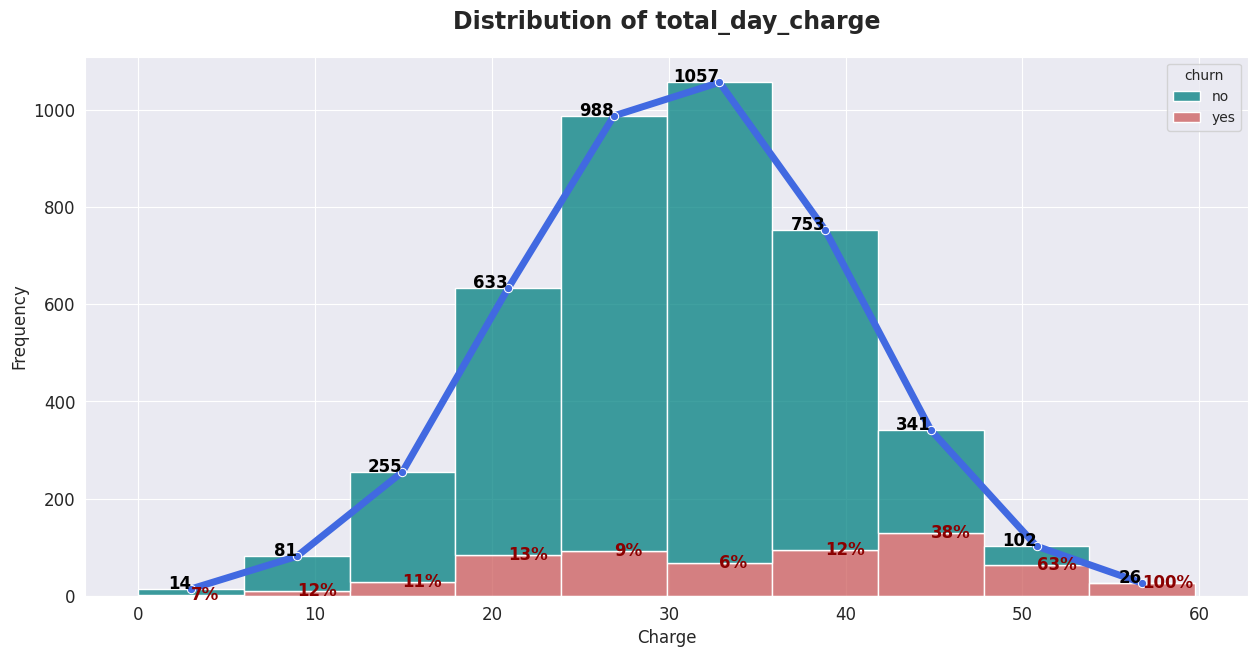

In [19]:
n = 10
target_variabel = ['total_day_charge', 'churn']

fig, ax1 = plt.subplots(figsize=(15,7))
sns.histplot(data=df, x=target_variabel[0], bins=n, stat='count', hue=target_variabel[1], multiple='stack', palette=['teal', 'indianred'], ax=ax1)
plot = extract_data(ax1, n)
plot.hist_label()
plot.line_label()
sns.lineplot(x=plot.x_interval, y=plot.y_total, marker='o', sort=False, color='royalblue', estimator=None, linewidth=5, ax=ax1)

ax1.set_title('Distribution of {}'.format(target_variabel[0]), fontweight='bold', pad=20, fontsize=17)
ax1.tick_params(labelsize=12)
ax1.set_xlabel('Charge', fontsize=12)
ax1.set_ylabel('Frequency', fontsize=12)
ax1.tick_params(labelsize=12)
plt.show()

The `total_day_charge` are normal distribution with an average per customer of 30.0, while for customer churn the distribution fluctuates and starts to increase when the cost is more than 40.0 and for all customer is churn (100%) when it is more than 54.0 which identifies the relationship between the greater the daily call costs the more customers will be churn.

<div id='distribution-customer-churn-in-total-international-charge'><h4><b>Distribution Customer Churn in Total International Charge</b></h4></div>

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

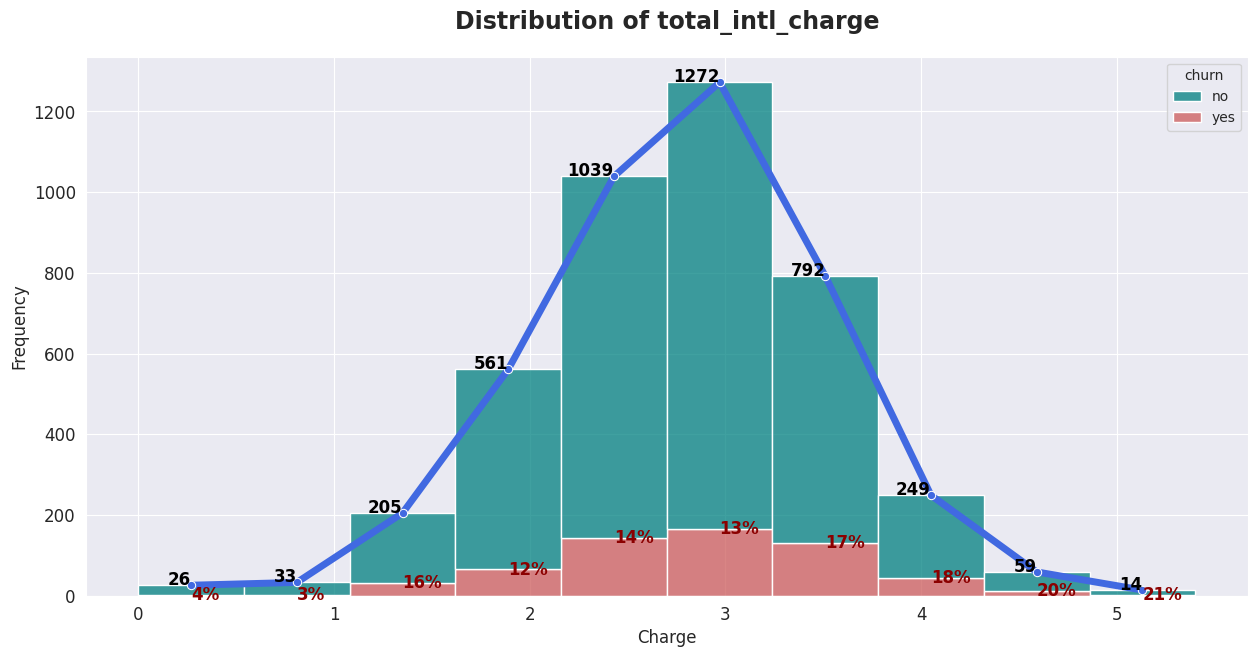

In [20]:
n = 10
target_variabel = ['total_intl_charge', 'churn']

fig, ax1 = plt.subplots(figsize=(15,7))
sns.histplot(data=df, x=target_variabel[0], bins=n, stat='count', hue=target_variabel[1], multiple='stack', palette=['teal', 'indianred'], ax=ax1)
plot = extract_data(ax1, n)
plot.hist_label()
plot.line_label()
sns.lineplot(x=plot.x_interval, y=plot.y_total, marker='o', sort=False, color='royalblue', estimator=None, linewidth=5, ax=ax1)

ax1.set_title('Distribution of {}'.format(target_variabel[0]), fontweight='bold', pad=20, fontsize=17)
ax1.tick_params(labelsize=12)
ax1.set_xlabel('Charge', fontsize=12)
ax1.set_ylabel('Frequency', fontsize=12)
ax1.tick_params(labelsize=12)

plt.show()

Meanwhile, if you look at the distribution of `total_international_charge` per day, the average customer only spends 2.7 - 3.2 per day and then for the percentage of customer churn has started to increase since the total call costs were above. 3.0.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

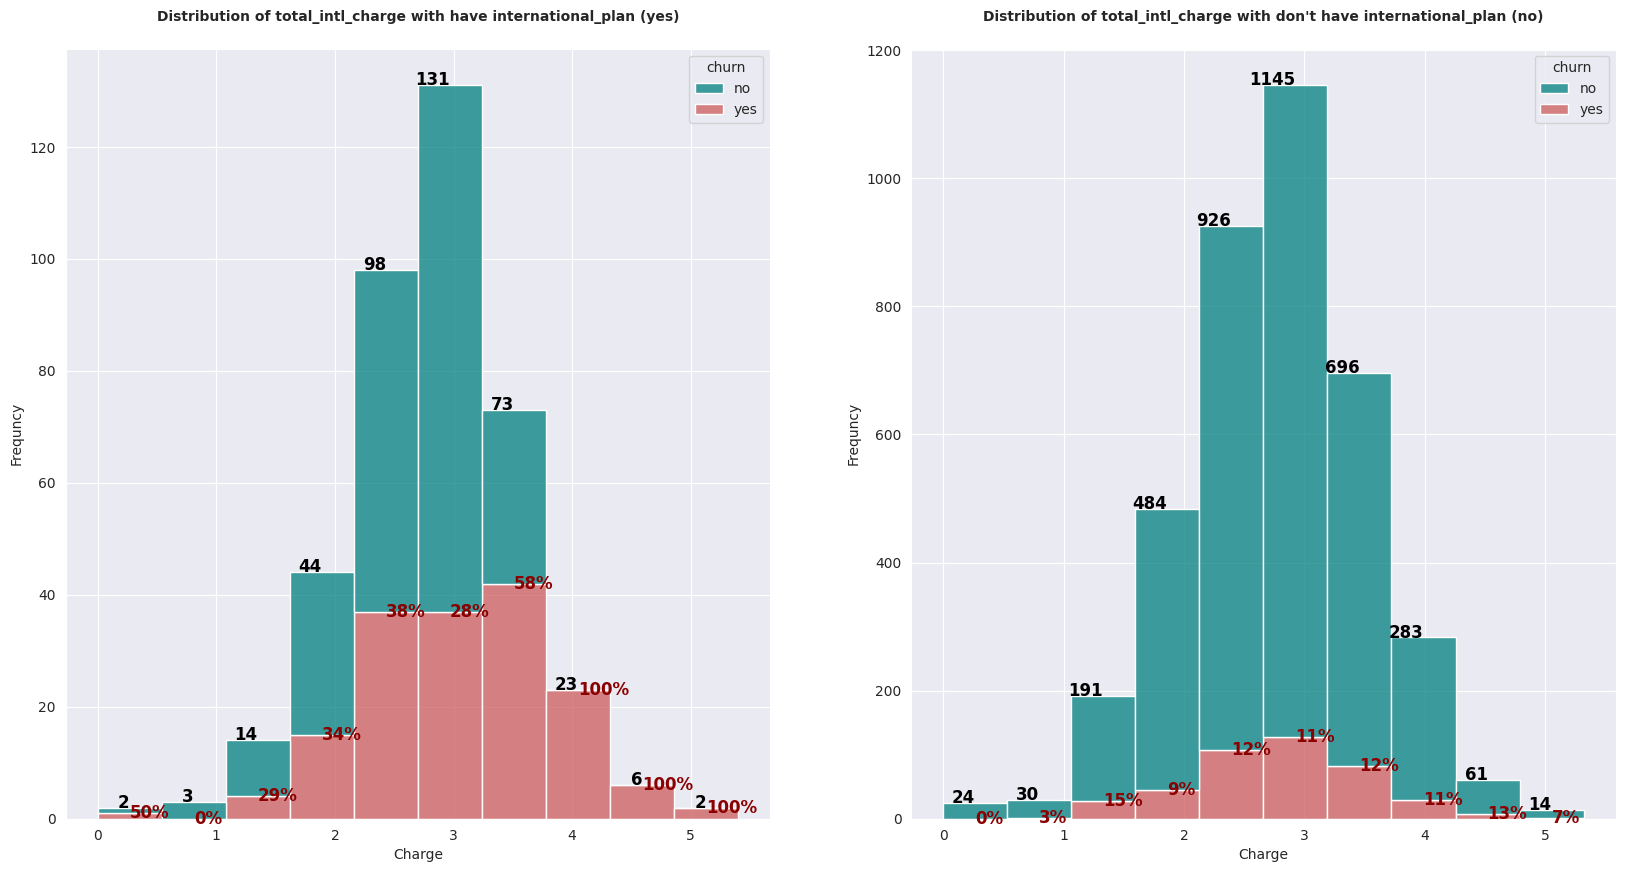

In [21]:
n = 10
target_variabel = ['total_intl_charge', 'churn', 'international_plan']

fig, ax2 = plt.subplots(1,2, figsize=(20,10))
sns.histplot(data=df[df[target_variabel[2]]=='yes'], x=target_variabel[0], bins=n, stat='count', hue=target_variabel[1], multiple='stack', palette=['teal', 'indianred'], ax=ax2[0])
plot1 = extract_data(ax2[0], n)
plot1.hist_label()
plot1.line_label()
ax2[0].set_title('Distribution of {} with have {} (yes)'.format(target_variabel[0], target_variabel[2]), fontweight='bold', pad=20, fontsize=10)
ax2[0].set_xlabel('Charge', fontsize=10)
ax2[0].set_ylabel('Frequncy', fontsize=10)
ax2[0].tick_params(labelsize=10)


sns.histplot(data=df[df[target_variabel[2]]=='no'], x=target_variabel[0], bins=n, stat='count', hue=target_variabel[1], multiple='stack', palette=['teal', 'indianred'], ax=ax2[1])
plot2 = extract_data(ax2[1], n)
plot2.hist_label()
plot2.line_label()
ax2[1].set_title("Distribution of {} with don't have {} (no)".format(target_variabel[0], target_variabel[2]), fontweight='bold', pad=20, fontsize=10)
ax2[1].set_xlabel('Charge', fontsize=10)
ax2[1].set_ylabel('Frequncy', fontsize=10)
ax2[1].tick_params(labelsize=10)

But if you breakdown for more details with column (variabel) `international_plan` category (yes or no). Based on comparison of the two visualizations above, it shows very different results between customers who have an `international_plan` (yes) and those who don't have an `international_plan` (no), where having `international_plan` should be able to help customers, especially in terms of reduce cost with affordable prices so that customers don't churn, however the visualization results show that there are still many customers who churn when the price above 3.0 with `international_plan` (yes).

<div id='distribution-customer-churn-in-total-international-calls'><h4><b>Distribution Customer Churn in Total International Calls</b></h4></div>

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

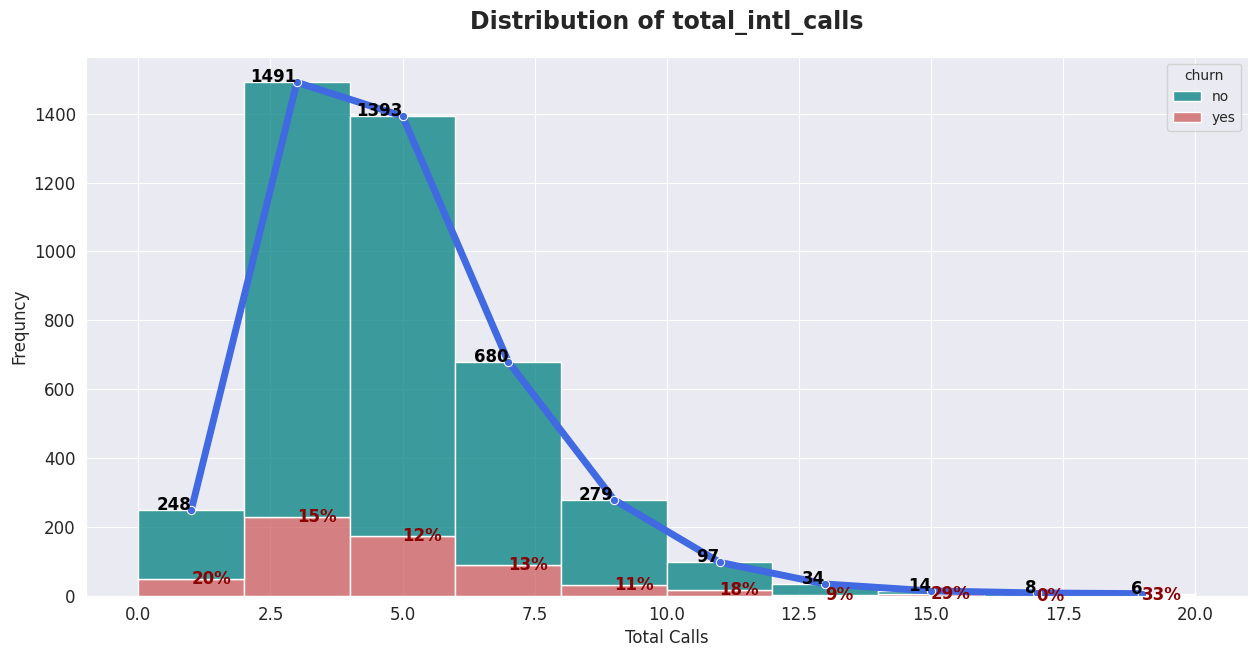

In [22]:
n = 10
target_variabel = ['total_intl_calls', 'churn']

fig, ax1 = plt.subplots(figsize=(15,7))
sns.histplot(data=df, x=target_variabel[0], bins=n, stat='count', hue=target_variabel[1], multiple='stack', palette=['teal', 'indianred'], ax=ax1)
plot = extract_data(ax1, n)
plot.hist_label()
plot.line_label()
sns.lineplot(x=plot.x_interval, y=plot.y_total, marker='o', sort=False, color='royalblue', estimator=None, linewidth=5, ax=ax1)

ax1.set_title('Distribution of {}'.format(target_variabel[0]), fontweight='bold', pad=20, fontsize=17)
ax1.tick_params(labelsize=12)
ax1.set_xlabel('Total Calls', fontsize=12)
ax1.set_ylabel('Frequncy', fontsize=12)
ax1.tick_params(labelsize=12)
plt.show()

In fact, if you look at the `total_international_calls`, the most customer churn comes from customers who make less than 8 international calls per day, where on average customers only make international calls 4 - 5 times per day with data distribution skewed more to right. So many customers who use international calls is churn because apart from the costs/charge which quite high and another factor is come from customer's needs, there are not too many international calls per day, in contrast to customers who are still stay with that provider, where these customers do have a need for international calls with a total of more than 10 calls per day.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

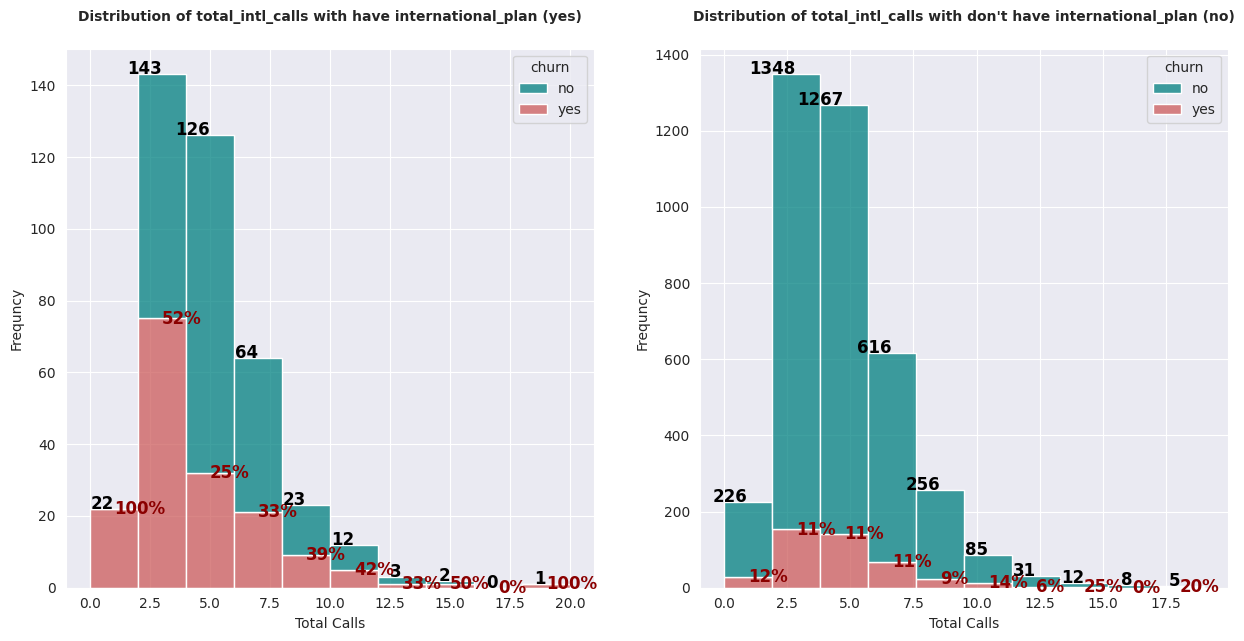

In [23]:
n = 10
target_variabel = ['total_intl_calls', 'churn', 'international_plan']

fig, ax2 = plt.subplots(1,2, figsize=(15,7))
sns.histplot(data=df[df[target_variabel[2]]=='yes'], x=target_variabel[0], bins=n, stat='count', hue=target_variabel[1], multiple='stack', palette=['teal', 'indianred'], ax=ax2[0])
plot1 = extract_data(ax2[0], n)
plot1.hist_label()
plot1.line_label()
ax2[0].set_title('Distribution of {} with have {} (yes)'.format(target_variabel[0], target_variabel[2]), fontweight='bold', pad=20, fontsize=10)
ax2[0].tick_params(labelsize=10)
ax2[0].set_xlabel('Total Calls', fontsize=10)
ax2[0].set_ylabel('Frequncy', fontsize=10)
ax2[0].tick_params(labelsize=10)

sns.histplot(data=df[df[target_variabel[2]]=='no'], x=target_variabel[0], bins=n, stat='count', hue=target_variabel[1], multiple='stack', palette=['teal', 'indianred'], ax=ax2[1])
plot2 = extract_data(ax2[1], n)
plot2.hist_label()
plot2.line_label()
ax2[1].set_title("Distribution of {} with don't have {} (no)".format(target_variabel[0], target_variabel[2]), fontweight='bold', pad=20, fontsize=10)
ax2[1].tick_params(labelsize=10)
ax2[1].set_xlabel('Total Calls', fontsize=10)
ax2[1].set_ylabel('Frequncy', fontsize=10)
ax2[1].tick_params(labelsize=10)

plt.show()

The distribution of `total_intl_calls` for customers both those who have an `international_plan` (yes) and those who don't have an `international_plan` (no) is the same as the data distribution which tends to be skewed to right with most customers for `total_intl_calls` being 3 per day. However, the percentage of customers who churn for those who have an `international_plan` (yes) is very high, especially for customers with `total_intl_calls` less than 8 per day.

<div id='distribution-customer-churn-in-number-vmail-messages'><h4><b>Distribution Customer Churn in Number Vmail Messages</b></h4></div>

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

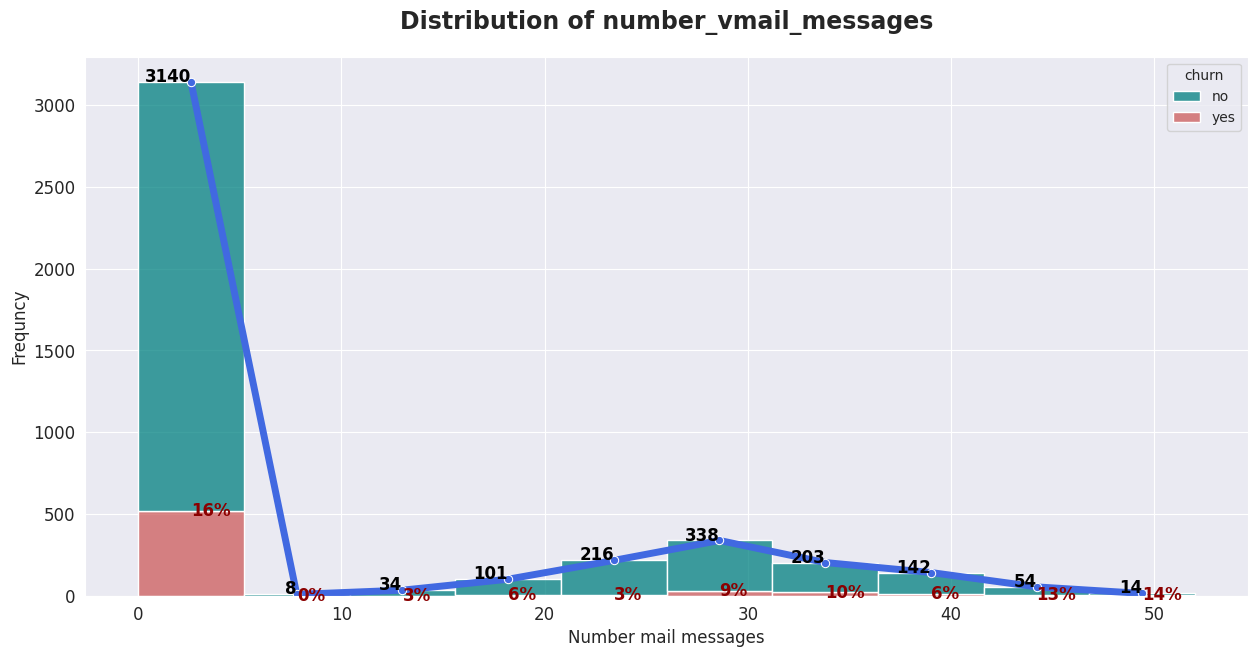

In [24]:
n = 10
target_variabel = ['number_vmail_messages', 'churn']

fig, ax1 = plt.subplots(figsize=(15,7))
sns.histplot(data=df, x=target_variabel[0], bins=n, stat='count', hue=target_variabel[1], multiple='stack', palette=['teal', 'indianred'], ax=ax1)
plot = extract_data(ax1, n)
plot.hist_label()
plot.line_label()
sns.lineplot(x=plot.x_interval, y=plot.y_total, marker='o', sort=False, color='royalblue', estimator=None, linewidth=5, ax=ax1)

ax1.set_title('Distribution of {}'.format(target_variabel[0]), fontweight='bold', pad=20, fontsize=17)
ax1.tick_params(labelsize=12)
ax1.set_xlabel('Number mail messages', fontsize=12)
ax1.set_ylabel('Frequncy', fontsize=12)
ax1.tick_params(labelsize=12)
plt.show()

The majority of customers do not have `number_vmail_messages`. It can be seen from the distribution that is skewed to the right with the peak at 0, where 16% of customers who do not have `number_vmail_messages` is churn.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

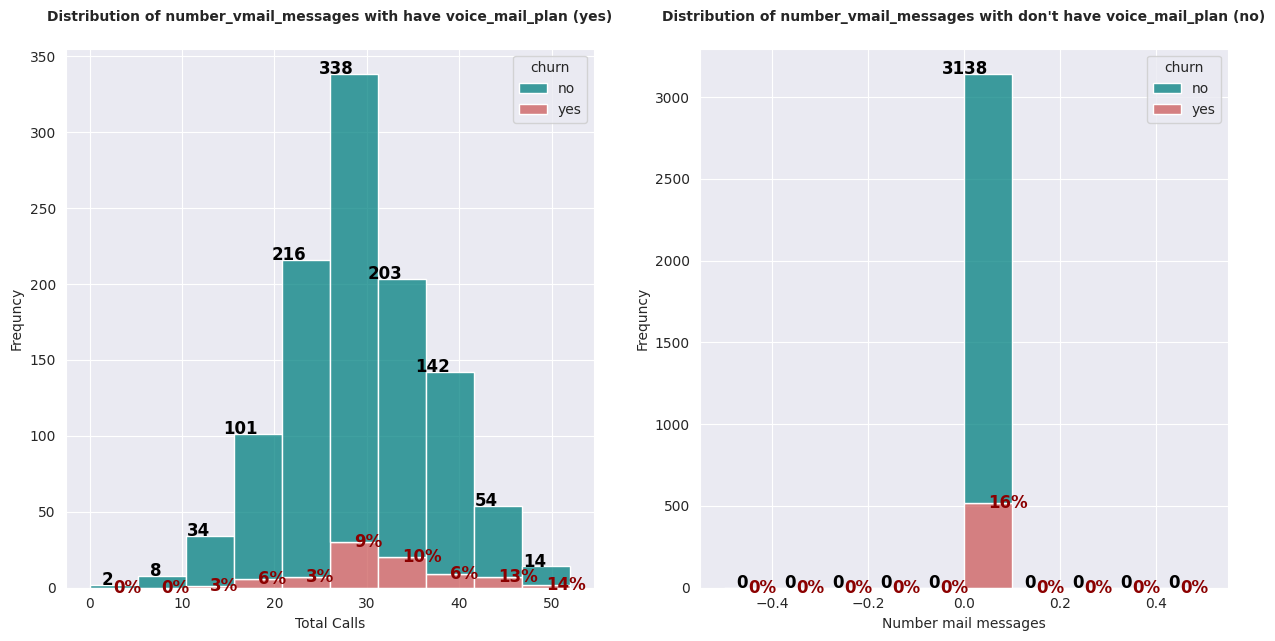

In [25]:
n = 10
target_variabel = ['number_vmail_messages', 'churn', 'voice_mail_plan']

fig, ax2 = plt.subplots(1,2, figsize=(15,7))
sns.histplot(data=df[df[target_variabel[2]]=='yes'], x=target_variabel[0], bins=n, stat='count', hue=target_variabel[1], multiple='stack', palette=['teal', 'indianred'], ax=ax2[0])
plot1 = extract_data(ax2[0], n)
plot1.hist_label()
plot1.line_label()
ax2[0].set_title('Distribution of {} with have {} (yes)'.format(target_variabel[0], target_variabel[2]), fontweight='bold', pad=20, fontsize=10)
ax2[0].tick_params(labelsize=10)
ax2[0].set_xlabel('Total Calls', fontsize=10)
ax2[0].set_ylabel('Frequncy', fontsize=10)
ax2[0].tick_params(labelsize=10)

sns.histplot(data=df[df[target_variabel[2]]=='no'], x=target_variabel[0], bins=n, stat='count', hue=target_variabel[1], multiple='stack', palette=['teal', 'indianred'], ax=ax2[1])
plot2 = extract_data(ax2[1], n)
plot2.hist_label()
plot2.line_label()
ax2[1].set_title("Distribution of {} with don't have {} (no)".format(target_variabel[0], target_variabel[2]), fontweight='bold', pad=20, fontsize=10)
ax2[1].tick_params(labelsize=10)
ax2[1].set_xlabel('Number mail messages', fontsize=10)
ax2[1].set_ylabel('Frequncy', fontsize=10)
ax2[1].tick_params(labelsize=10)

plt.show()

And after breaking it down in more detail based on `voice_mail_plan` (yes or no), it can be see that the `number_vmail_message` distribution is at zero (0) is comes from customers who don't have a `voice_mail_plan` (no), while for customers who have `voice_mail_plan` (yes) the `number_vmail_message` data is distributed normal with an average `number_vmail_messages` in 30 voice messages per day and the percentage of customers who churn is also much lower than customers who do not have a `voice_mail_plan` (no).

<div id='distribution-customer-churn-in-number-customer-service-calls'><h4><b>Distribution Customer Churn in Number Customer Service Calls</b></h4></div>

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

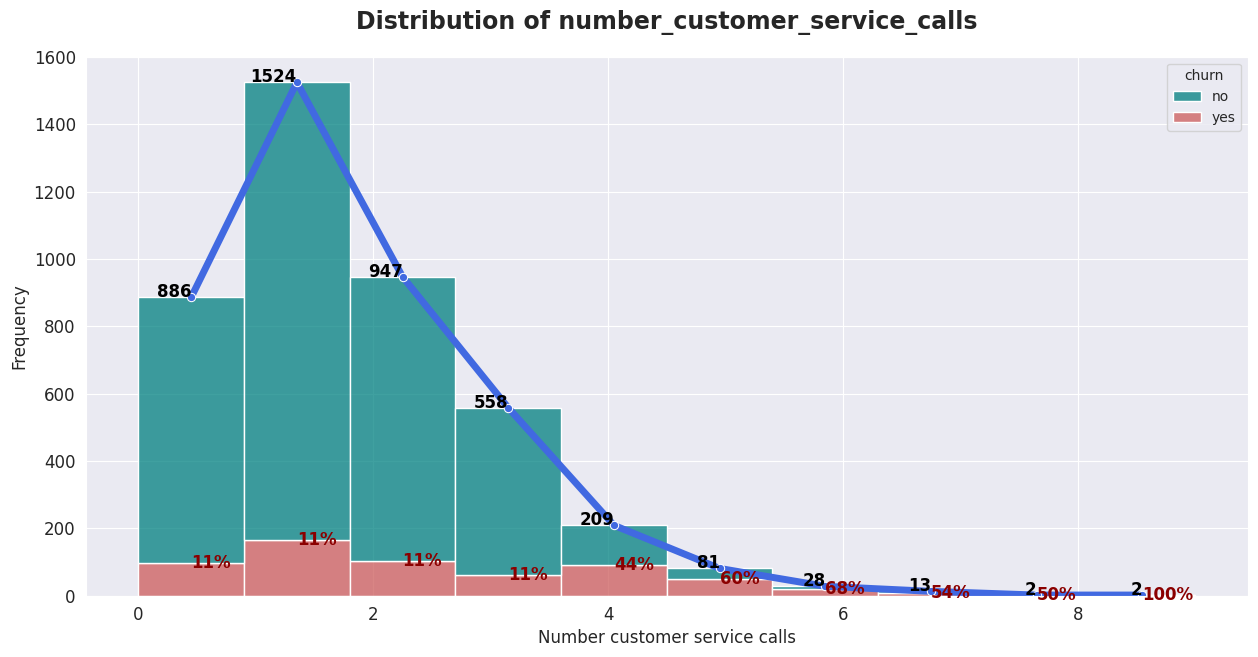

In [26]:
n = 10
target_variabel = ['number_customer_service_calls', 'churn']

fig, ax1 = plt.subplots(figsize=(15,7))
sns.histplot(data=df, x=target_variabel[0], bins=n, stat='count', hue=target_variabel[1], multiple='stack', palette=['teal', 'indianred'], ax=ax1)
plot = extract_data(ax1, n)
plot.hist_label()
plot.line_label()
sns.lineplot(x=plot.x_interval, y=plot.y_total, marker='o', sort=False, color='royalblue', estimator=None, linewidth=5, ax=ax1)

ax1.set_title('Distribution of {}'.format(target_variabel[0]), fontweight='bold', pad=20, fontsize=17)
ax1.tick_params(labelsize=12)
ax1.set_xlabel('Number customer service calls', fontsize=12)
ax1.set_ylabel('Frequency', fontsize=12)
ax1.tick_params(labelsize=12)
plt.show()

For the `number_customer_service_calls`, most of users make calls only once, with the data distribution skewed to the right. Meanwhile, the percentage of customers who churn appears to be increasing at same time with increase `number_customer_service_calls`. Especially for the `number_customer_service_calls` that is more than 8, all customers is churn, which indicates that the customer is experiencing a lot of problems either in terms of features or costs from the provider or the problem cannot be resolved so the customer is churns.

---
<div id='data-preparation'><h1><b>Data Preparation</b></h1></div>

[<h5>back to contents</h5>](#table-of-content)

<div id='missing-value'><h3><b>Missing Value</b></h3></div>

In [27]:
# check data with null value

df.isnull().sum()

state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

No missing values ​​in data

<div id='duplicat-data'><h3><b>Duplicat Data</b></h3></div>

In [28]:
# check duplikat data

df.duplicated().sum()

0

No duplicate rows in data

<div id='outlier'><h3><b>Outlier</b></h3></div>

In [29]:
# check outlier numerical data

num_column = df.describe().columns.values
n = 0
for col in num_column:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)
    total = len(df[col][(((df[col] < low_limit)) | (df[col] > high_limit))])
    n = n + total
    print('There are {} row data outlier in columns (varaibels) {}'.format(total, col))


There are 20 row data outlier in columns (varaibels) account_length
There are 86 row data outlier in columns (varaibels) number_vmail_messages
There are 25 row data outlier in columns (varaibels) total_day_minutes
There are 28 row data outlier in columns (varaibels) total_day_calls
There are 26 row data outlier in columns (varaibels) total_day_charge
There are 34 row data outlier in columns (varaibels) total_eve_minutes
There are 24 row data outlier in columns (varaibels) total_eve_calls
There are 34 row data outlier in columns (varaibels) total_eve_charge
There are 37 row data outlier in columns (varaibels) total_night_minutes
There are 33 row data outlier in columns (varaibels) total_night_calls
There are 37 row data outlier in columns (varaibels) total_night_charge
There are 62 row data outlier in columns (varaibels) total_intl_minutes
There are 100 row data outlier in columns (varaibels) total_intl_calls
There are 62 row data outlier in columns (varaibels) total_intl_charge
There a

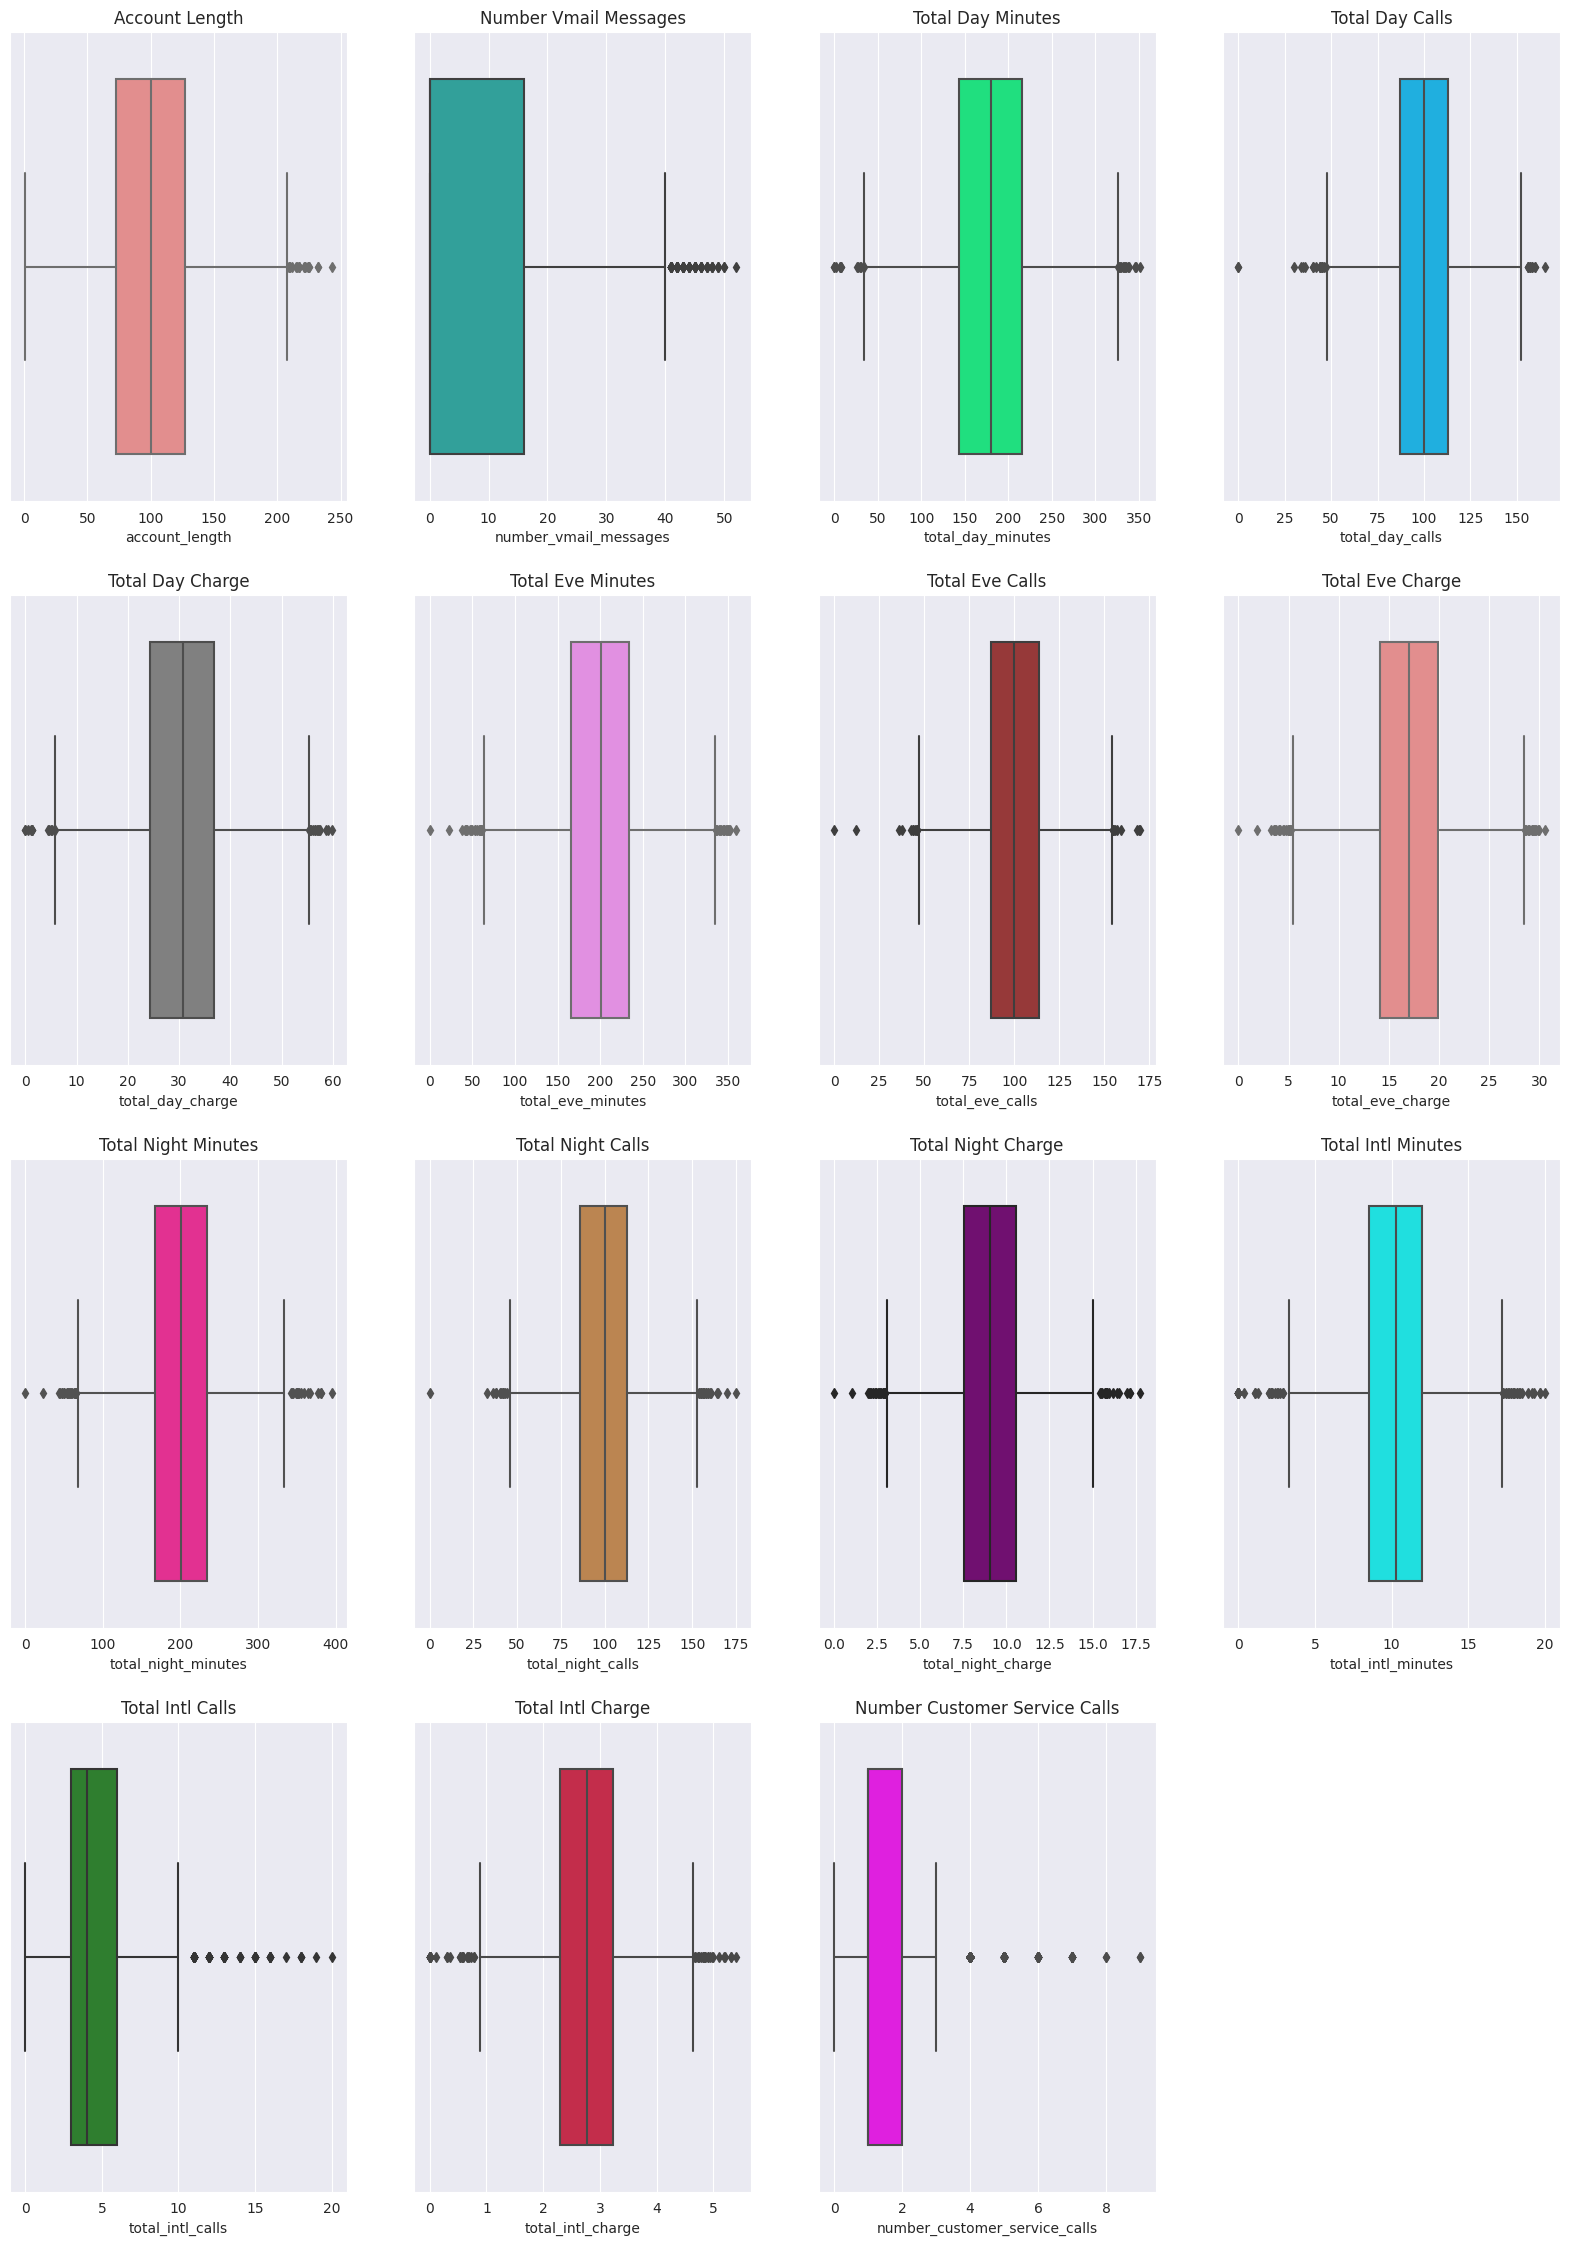

In [30]:
# Visualization with outlier data
colour = ['lightcoral','lightseagreen', 'springgreen', 'deepskyblue', 'gray', 'violet', 'brown', 'lightcoral', 'deeppink', 'peru',
          'purple', 'cyan', 'forestgreen', 'crimson', 'magenta']
fig = plt.figure(figsize=[20,50])
for i ,col in enumerate(num_column):
    ax = fig.add_subplot(7,4, i+1)
    ax = sns.boxplot(data = df, x=col, color=color_list[i])
    title = re.sub('_', ' ', col.title())
    ax.set_title(title)
    ax.set_xlabel(col)

Based on the results of boxplot visualization and checking outlier data using interquartile (IQR) method to determine the upper and lower limits, it can be seen that almost all numerical columns (variables) have outliers.

In [31]:
# change outlier value with low limit and high limit (IQR Methode)

n = 0
for col in num_column:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)
    df[col] = df[col].apply(lambda x: high_limit if x > high_limit else (low_limit if x < low_limit else x))
    total = len(df[col][(((df[col] < low_limit)) | (df[col] > high_limit))])
    n = n + total
    print('There are {} row data outlier in columns (variabels) {}'.format(total, col))

There are 0 row data outlier in columns (variabels) account_length
There are 0 row data outlier in columns (variabels) number_vmail_messages
There are 0 row data outlier in columns (variabels) total_day_minutes
There are 0 row data outlier in columns (variabels) total_day_calls
There are 0 row data outlier in columns (variabels) total_day_charge
There are 0 row data outlier in columns (variabels) total_eve_minutes
There are 0 row data outlier in columns (variabels) total_eve_calls
There are 0 row data outlier in columns (variabels) total_eve_charge
There are 0 row data outlier in columns (variabels) total_night_minutes
There are 0 row data outlier in columns (variabels) total_night_calls
There are 0 row data outlier in columns (variabels) total_night_charge
There are 0 row data outlier in columns (variabels) total_intl_minutes
There are 0 row data outlier in columns (variabels) total_intl_calls
There are 0 row data outlier in columns (variabels) total_intl_charge
There are 0 row data o

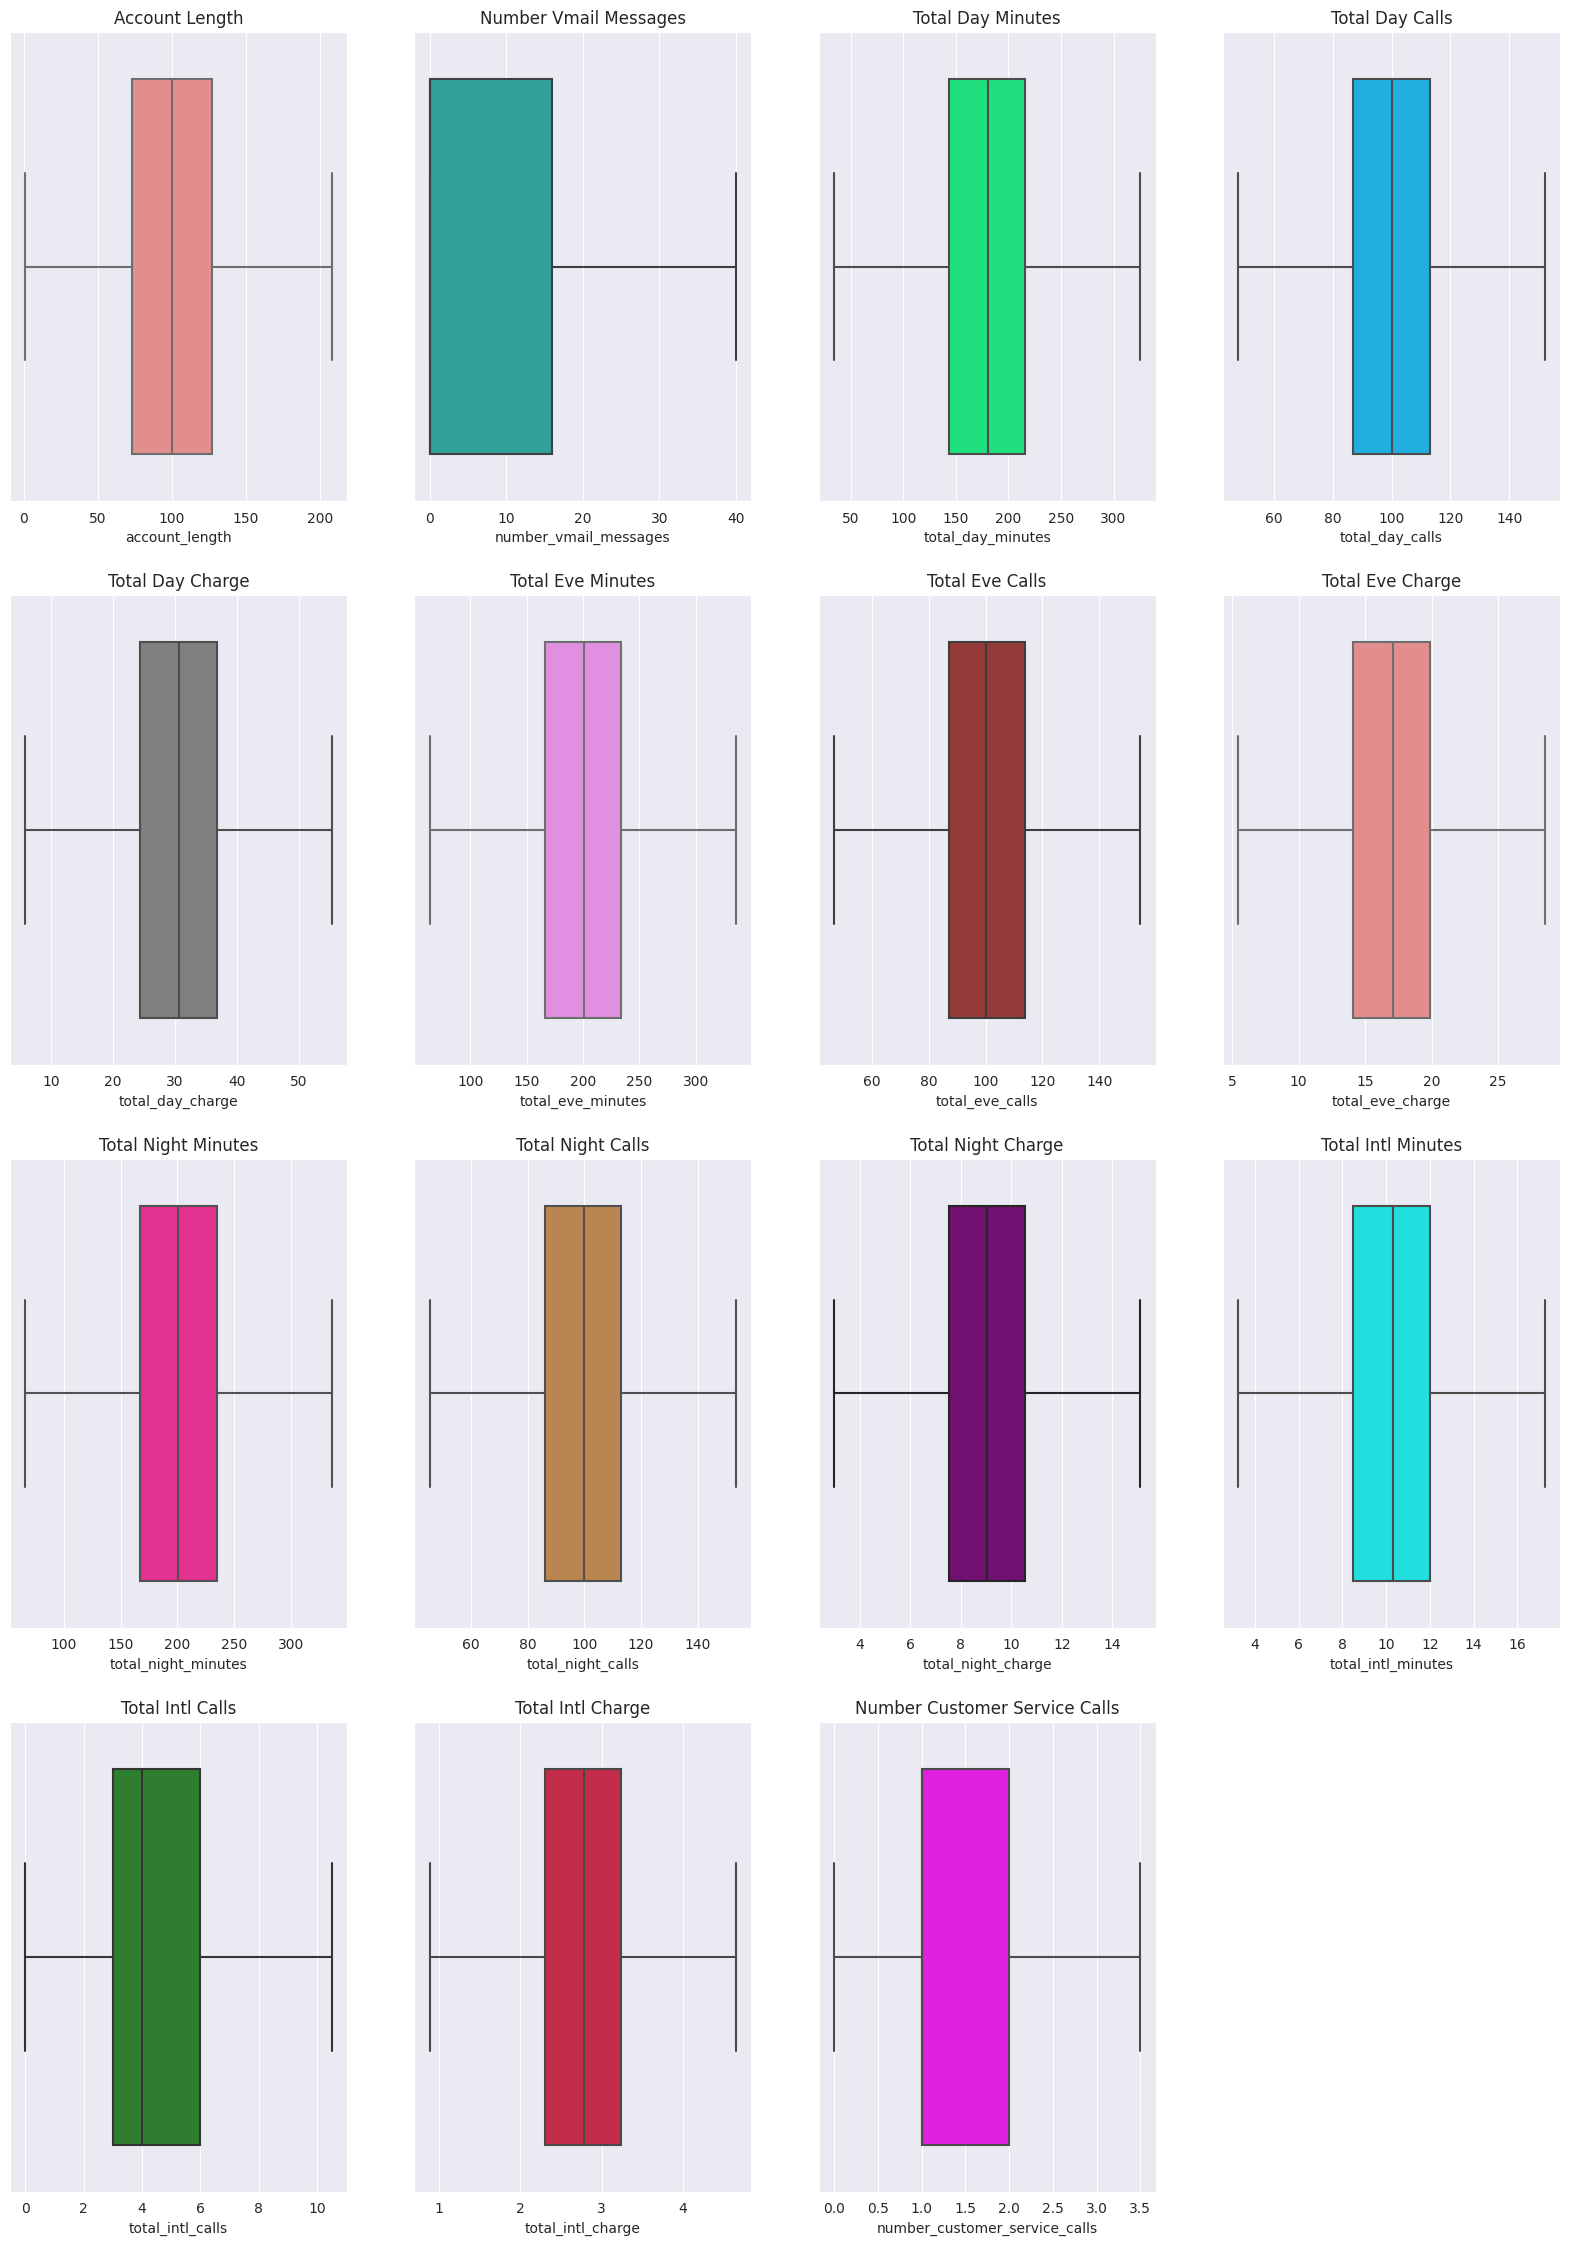

In [32]:
# Visualization without outlier data

fig = plt.figure(figsize=[20,50])
for i ,col in enumerate(num_column):
    ax = fig.add_subplot(7,4, i+1)
    ax = sns.boxplot(data = df, x=col, color=color_list[i])
    title = re.sub('_', ' ', col.title())
    ax.set_title(title)
    ax.set_xlabel(col)

By using the IQR method to determine the upper and lower limits for each column (variable), it can be seen from the visualization results that all numerical columns (variables) are now free from outliers.

<div id='feature-encoding'><h3><b>Features Encoding</b></h3></div>

In [33]:
# Label Encoding

for col in ['international_plan', 'voice_mail_plan','churn']:
    df[col] = df[col].map({'yes':1, 'no':0})

Change string data type (yes or no) to integer (1 or 0) in columns (variabels) :
- `international_plan`
- `voice_mail_plan`
- `churn`

<div id='dimensionality-reduction'><h3><b>Dimensionality Reduction</b></h3></div>

In [34]:
# Dimensionality Reduction

df['total_minutes'] = df['total_day_minutes'] + df['total_eve_minutes'] + df['total_night_minutes']
df['total_calls'] = df['total_day_calls'] + df['total_eve_calls'] + df['total_night_calls']
df['total_charge'] = df['total_day_charge'] + df['total_eve_charge'] + df['total_night_charge']

Dimensionality reduction is reduce number of features/columns/variables without losing information in the data, such as by adding up:
- `total_minutes`,
- `total_calls`,
- `total_charge`.
<br><br>
Which is a combination of total day, total eve and total night from columns (variabel) calls, minutes and charge.

Meanwhile for **international calls** columns (variabels) such as:
- `total_intl_minutes`,
- `total_intl_calls`,
- `total_intl_charge`.
<br><br>
This columns (variabel) not included in dimensionality reduction because this column (variable) is related to `international_plan`.

<div id='correlation'><h3><b>Correlation</b></h3></div>

In [35]:
exclude_column = ['total_day_minutes'
                        , 'total_eve_minutes'
                        , 'total_night_minutes'
                        , 'total_day_calls'
                        , 'total_eve_calls'
                        , 'total_night_calls'
                        , 'total_day_charge'
                        , 'total_eve_charge'
                        , 'total_night_charge'
                        , 'state'
                        , 'area_code'
                        , 'account_length'
                        ]

Several columns (variables) that have been included in dimension reduction will be excluded, as well as other variables such as : 
- `state`, 
- `area_code`, and 
- `account_length`.

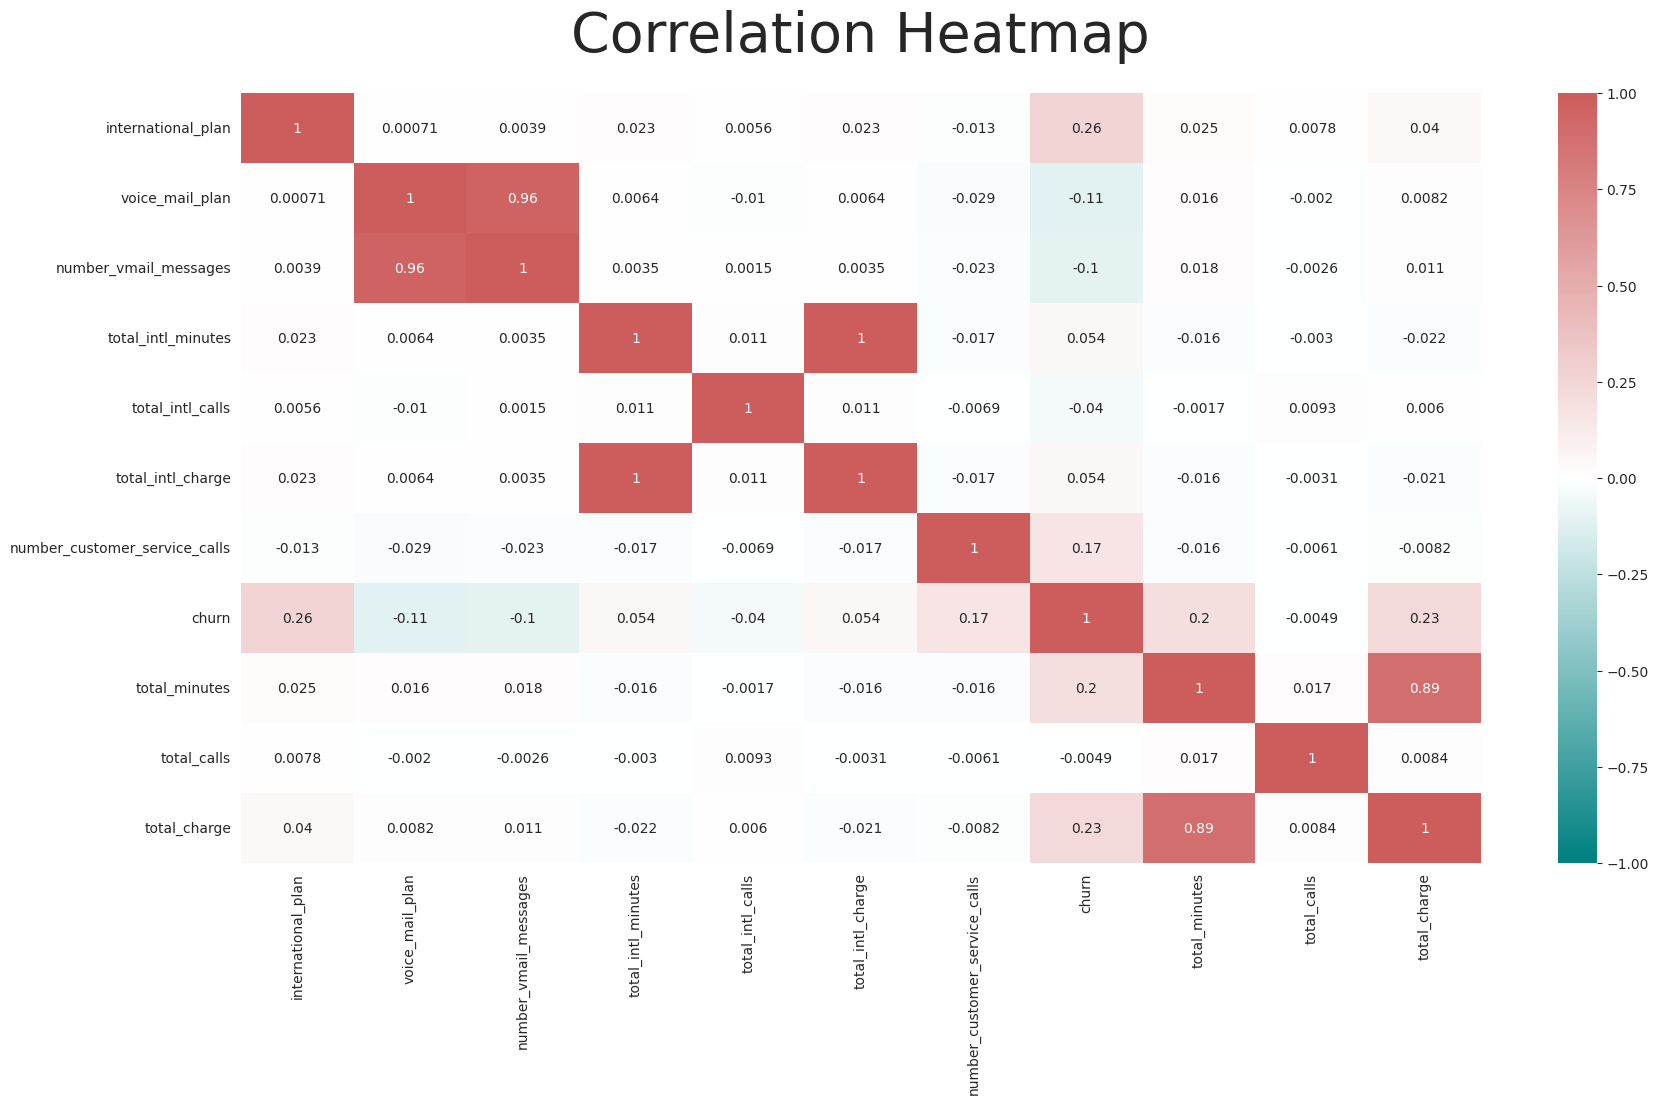

In [36]:
from matplotlib.colors import LinearSegmentedColormap
colors = [(0, 'teal'), (0.5, 'white'), (1, 'indianred')]
cmap = LinearSegmentedColormap.from_list('custom_cmap', colors)
plt.figure(figsize=(20,10))
ax = sns.heatmap(df.drop(columns=exclude_column).corr(), annot=True, cmap=cmap, vmin=-1, vmax=1)
ax.set_title('Correlation Heatmap', fontdict={'fontsize':40}, pad=30)
plt.show()

Correlation between columns (variables) with heatmap visualization shows the relationship between variables such as:
- Relationship between `total_minutes` and `total_charge` (unidirectional relationship)
- Relationship between `total_intl_charge` and `total_intl_minutes` (unidirectional relationship)
- Relationship between `voice_mail_plan` and `number_vmail_messages` (unidirectional relationship)

It might be a little confusing if you look at the overall correlation between columns (variables), so let's just focus on one column (target variable) `churn`.

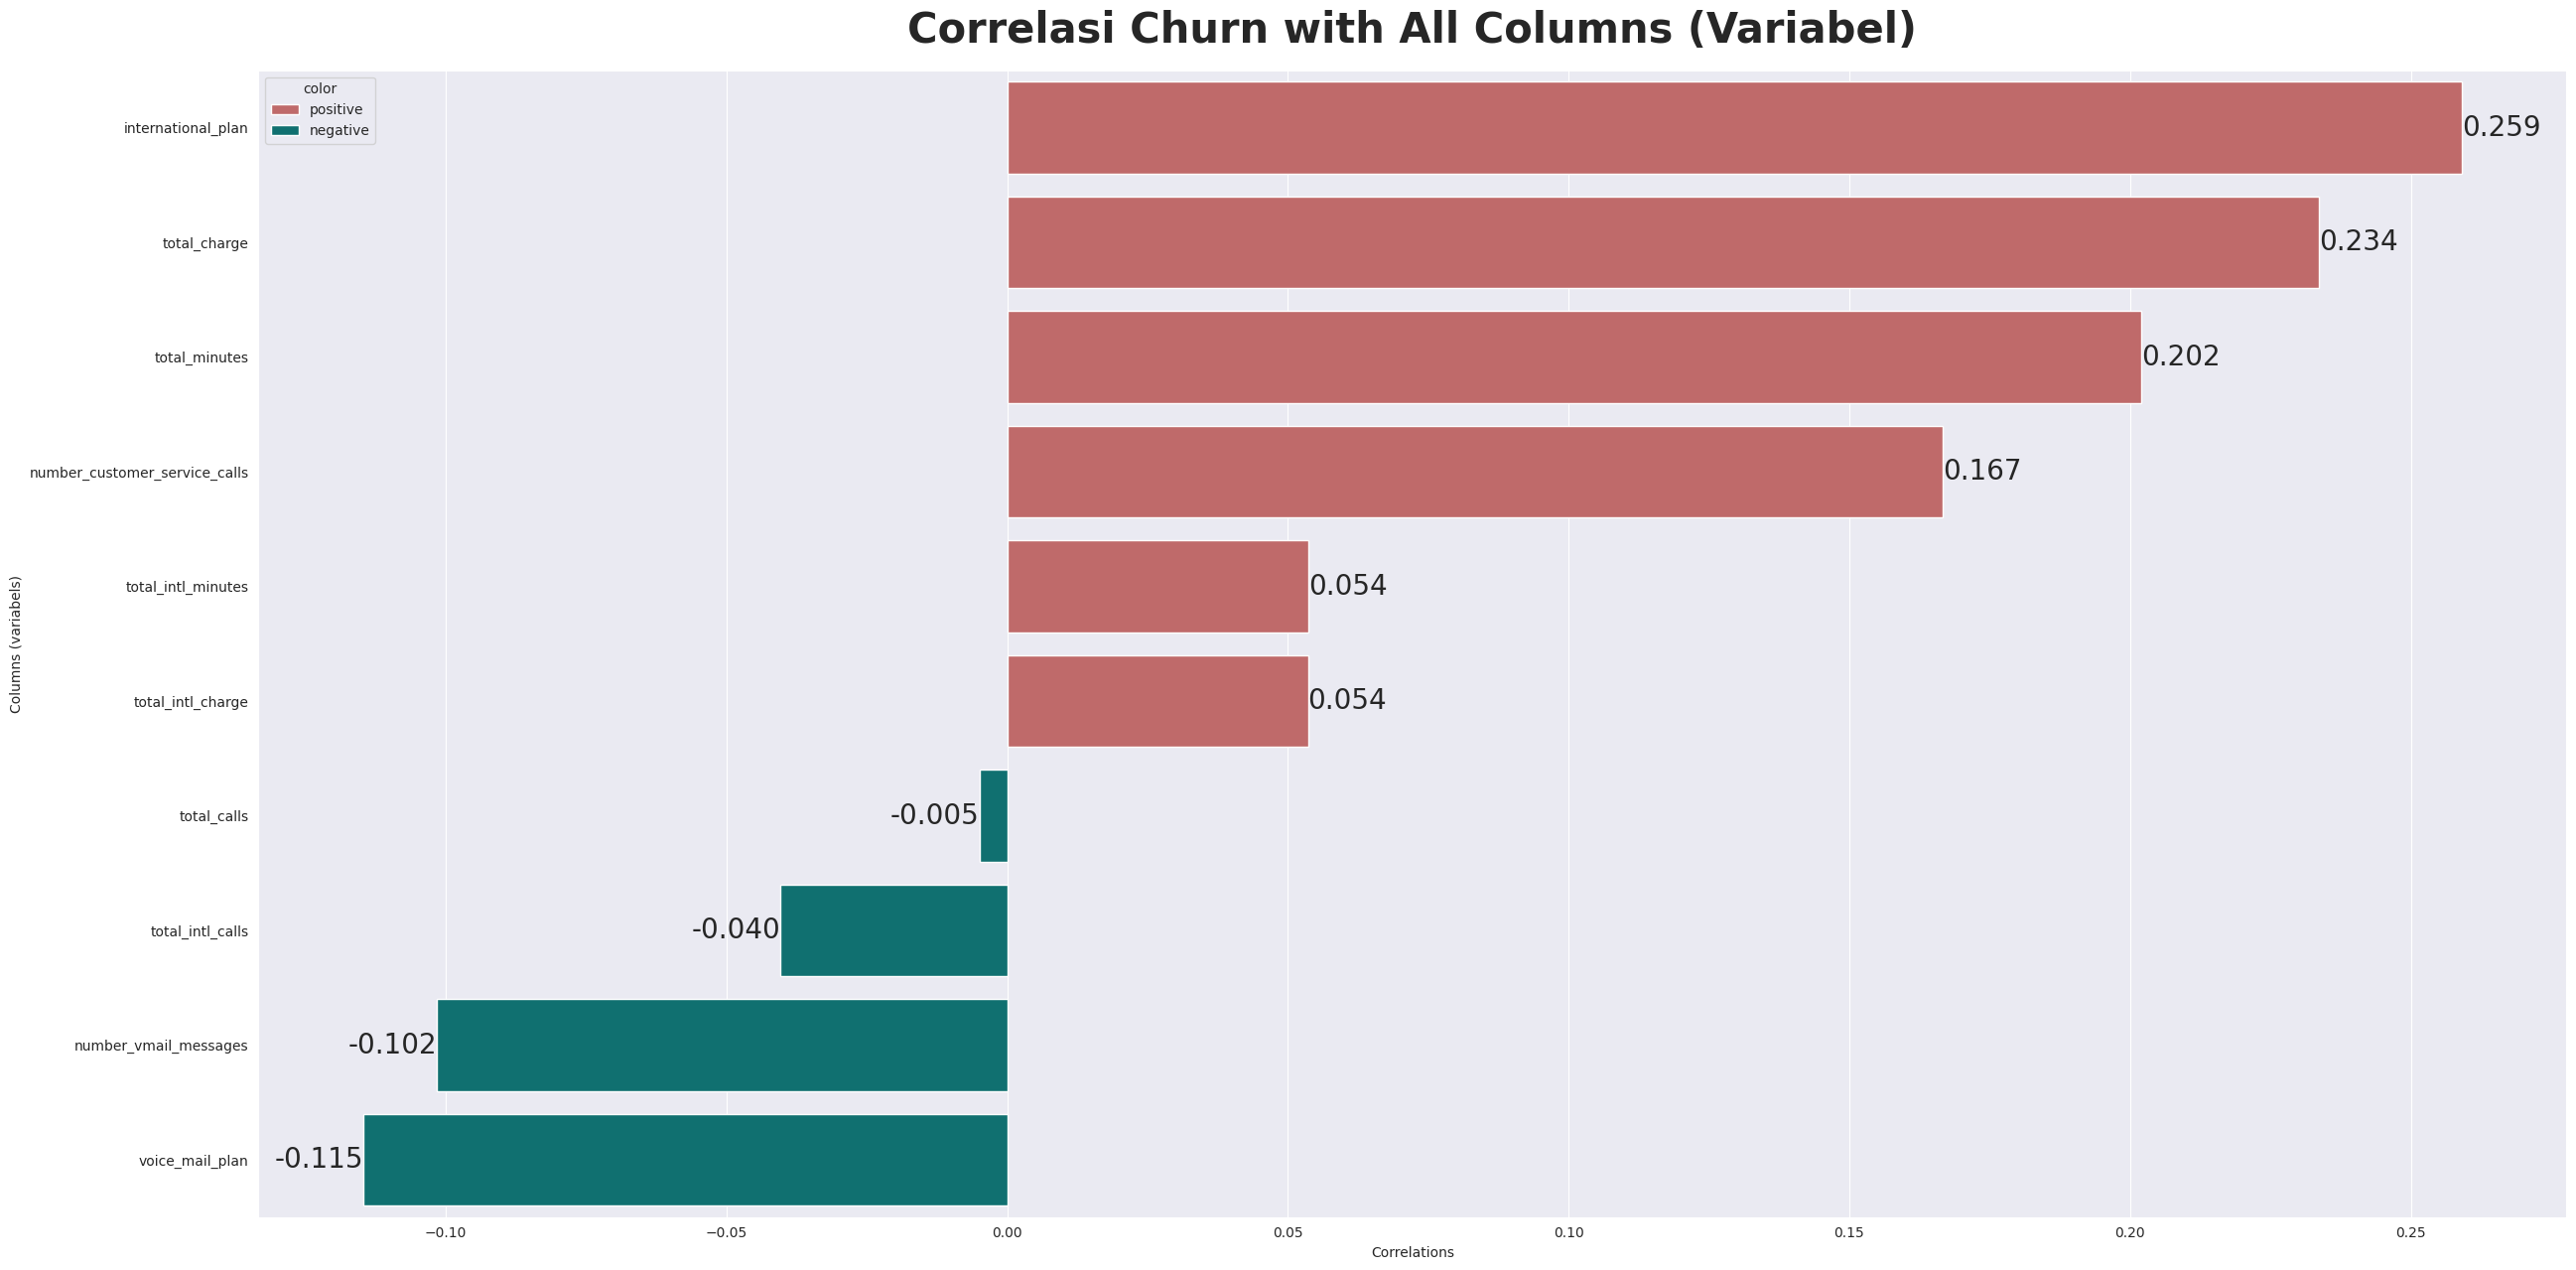

In [37]:
churn_corr = df.drop(columns=exclude_column).corr()['churn'].sort_values(ascending=False)[1:].reset_index().rename(columns={'index':'variabel', 'churn':'correlation'})
churn_corr['color'] = ['positive' if value > 0 else 'negative' for value in churn_corr['correlation']]
palette = {'positive':'indianred', 'negative':'teal'}

plt.figure(figsize=(30,15))
ax = sns.barplot(data=churn_corr, y='variabel', x='correlation', hue='color', palette=palette, dodge=False)
ax.bar_label(ax.containers[0], fontsize=20, fmt='%.3f')
ax.bar_label(ax.containers[1], fontsize=20, fmt='%.3f')
ax.set_xlabel('Correlations')
ax.set_ylabel('Columns (variabels)')
ax.set_title('Correlasi Churn with All Columns (Variabel)', fontweight='bold', fontsize=30, pad=20)
plt.show()

Based on the results, the correlation between several columns (variables) and churn can be see

Several columns (variables) that have a unidirectional relationship (making customer churn) like :
- `international_plan`,
- `total_charge`,
- `total_minutes`,
- `number_customer_service_calls`,
- `total_intl_minutes`,
- `total_intl_charge`.

Other columns (variables) that have an inverse relationship (making customers stay) such as:
- `total_calls`,
- `total_intl_calls`,
- `number_vmail_message`,
- `voice_mail_plan`.

<div id='featrue-selection'><h3><b>Feature Selection</b></h3></div>

In [38]:
data = df.drop(columns=exclude_column)
data.head()

,international_plan,voice_mail_plan,number_vmail_messages,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn,total_minutes,total_calls,total_charge
0,0,1,26.0,13.7,3.0,3.70,1.0,0,611.50,329.0,55.540
1,0,0,0.0,12.2,5.0,3.29,0.0,0,527.20,328.0,59.000
2,1,0,0.0,6.6,7.0,1.78,2.0,0,560.45,248.0,65.215
3,1,0,0.0,10.1,3.0,2.73,3.0,0,501.90,356.0,49.360
4,0,1,24.0,7.5,7.0,2.03,3.0,0,766.35,314.0,75.175


In [39]:
# Feature Selection

y = data['churn']
X = data.drop(columns='churn')

The process of selecting columns (variables) that have a correlation with the target variable (churn) and separating the data to determine:
- dependent variable (y) with target variable (churn)
- independent variables (X), namely several columns (variables) that have a correlation with the target variable (churn)

<div id='standardization'><h3><b>Standardization</b></h3></div>

In [40]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X['number_vmail_messages'] = MinMaxScaler().fit_transform(X['number_vmail_messages'].values.reshape(len(X), 1))
X['total_intl_minutes'] = MinMaxScaler().fit_transform(X['total_intl_minutes'].values.reshape(len(X), 1))
X['total_intl_calls'] = MinMaxScaler().fit_transform(X['total_intl_calls'].values.reshape(len(X), 1))
X['total_intl_charge'] = MinMaxScaler().fit_transform(X['total_charge'].values.reshape(len(X), 1))
X['number_customer_service_calls'] = MinMaxScaler().fit_transform(X['number_customer_service_calls'].values.reshape(len(X), 1))
X['total_minutes'] = MinMaxScaler().fit_transform(X['total_minutes'].values.reshape(len(X), 1))
X['total_calls'] = MinMaxScaler().fit_transform(X['total_calls'].values.reshape(len(X), 1))
X['total_charge'] = MinMaxScaler().fit_transform(X['total_charge'].values.reshape(len(X), 1))

The process of transformation values ​​in several columns (variables) such as `number_vmail_messages`, `total_intl_minutes`, `total_intl_calls`, `total_intl_charge`, `number_customer_service_calls`, `total_minutes`, `total_calls`, `total_charge` to be scale between 0 - 1 so that each column has a normal distribution of values.

<div id='train-test-split'><h3><b>Train Test Split</b></h3></div>

In [41]:
from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.3, random_state = 123)

print('total X =', X.shape[0])
print('total X_train =', X_train.shape[0])
print('percent X_train = %.2f%%' % ( X_train.shape[0]/X.shape[0]*100))
print('\ntotal X_test', X_test.shape[0])
print('percent X_test = %.2f%%' % ( X_test.shape[0]/X.shape[0]*100))
print('\ntotal y', y.shape[0])
print('total Y_train', y_train.shape[0])
print('percent Y_train = %.2f%%' % ( y_train.shape[0]/y.shape[0]*100))
print('\ntotal Y_test', y_test.shape)
print('percent Y_test = %.2f%%' % ( y_test.shape[0]/y.shape[0]*100))

total X = 4250
total X_train = 2975
percent X_train = 70.00%

total X_test 1275
percent X_test = 30.00%

total y 4250
total Y_train 2975
percent Y_train = 70.00%

total Y_test (1275,)
percent Y_test = 30.00%


The process of separating train and testing data with a proportion of 70% training and 30% testing.

---
<div id='modeling-&-evaluation'><h1><b>Modeling & Evaluation</b></h1></div>

[<h5>back to contents</h5>](#table-of-content)

In [42]:
# Model Evaluation Function

import sklearn.metrics as sm
import sklearn.model_selection

kfold = model_selection.KFold(n_splits=10, shuffle = True, random_state=123)
model_list = pd.DataFrame(columns=['model_ml', 'accuracy', 'recall', 'precision', 'f1_score', 'cross_val_score', 'std'])

# Function to filter out empty or all-NA DataFrames
def filter_empty_or_all_na(dfs):
    filtered_dfs = []
    for df in dfs:
        if not df.empty and not df.isna().all().all():
            filtered_dfs.append(df)
    return filtered_dfs

# Function to evaluation models
def evaluation(y_test, y_pred, model, name_model):
    global model_list
    model_ml = name_model
    accuracy = sm.accuracy_score(y_test,y_pred)*100.0
    precision = sm.precision_score(y_test,y_pred)*100.0
    recall = sm.recall_score(y_test,y_pred)*100.0
    f1 = sm.f1_score(y_test, y_pred)*100.0
    result = model_selection.cross_val_score(model , X , y , cv=kfold , scoring='accuracy')
    new_row = [{
          'model_ml':model_ml
        , 'accuracy':accuracy
        , 'recall':recall
        , 'precision':precision
        , 'f1_score':f1
        , 'cross_val_score':result.mean()*100.00
        , 'std': result.std()*100.00
        }]
    for row in new_row:
        row_df = pd.DataFrame([row])
        filtered_dfs = filter_empty_or_all_na([model_list, row_df])
        model_list = pd.concat(filtered_dfs, ignore_index=True)

    print('Model {}'.format(model_ml))
    print("Accuracy Score: %.3f%%" % (accuracy))
    print("Precision Score: %.3f%%" % (precision))
    print("Recall Score: %.3f%%" % (recall))
    print("F1 Score: %.3f%%" % (f1))
    print("cross_val_score: %.3f%% (%.3f%%)" % (result.mean()*100.0, result.std()*100.0))

    print(sm.classification_report(y_test, y_pred))
    sm.ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=['no churn', 'churn'])


<div id='logistic-regression'><h3><b>Logistic Regression</b></h3></div>

Model LogisticRegression()
Accuracy Score: 88.078%
Precision Score: 75.610%
Recall Score: 17.919%
F1 Score: 28.972%
cross_val_score: 87.176% (1.463%)
              precision    recall  f1-score   support

           0       0.88      0.99      0.93      1102
           1       0.76      0.18      0.29       173

    accuracy                           0.88      1275
   macro avg       0.82      0.59      0.61      1275
weighted avg       0.87      0.88      0.85      1275



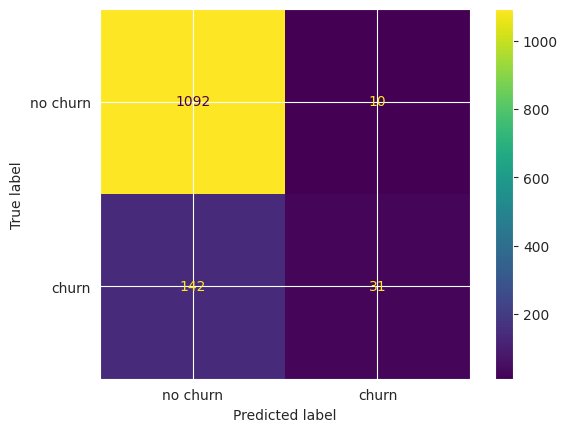

In [43]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(X_train, y_train)
y_pred = LR.predict(X_test)
evaluation(y_test, y_pred, LR, 'LogisticRegression()')

<div id='knn'><h3><b>KNN (K-Nearest Neighbors)</b></h3></div>

Model KNeighborsClassifier()
Accuracy Score: 92.549%
Precision Score: 83.051%
Recall Score: 56.647%
F1 Score: 67.354%
cross_val_score: 92.612% (0.906%)
              precision    recall  f1-score   support

           0       0.94      0.98      0.96      1102
           1       0.83      0.57      0.67       173

    accuracy                           0.93      1275
   macro avg       0.88      0.77      0.82      1275
weighted avg       0.92      0.93      0.92      1275



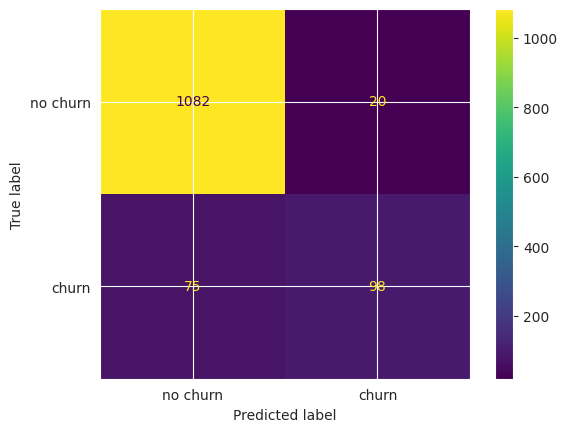

In [44]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier()
KNN.fit(X_train, y_train)
y_pred = KNN.predict(X_test)
evaluation(y_test, y_pred, KNN, 'KNeighborsClassifier()')

<div id='decision-tress'><h3><b>Decision Tree</b></h3></div>

Model DecisionTreeClassifier()
Accuracy Score: 96.392%
Precision Score: 86.705%
Recall Score: 86.705%
F1 Score: 86.705%
cross_val_score: 95.082% (0.838%)
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1102
           1       0.87      0.87      0.87       173

    accuracy                           0.96      1275
   macro avg       0.92      0.92      0.92      1275
weighted avg       0.96      0.96      0.96      1275



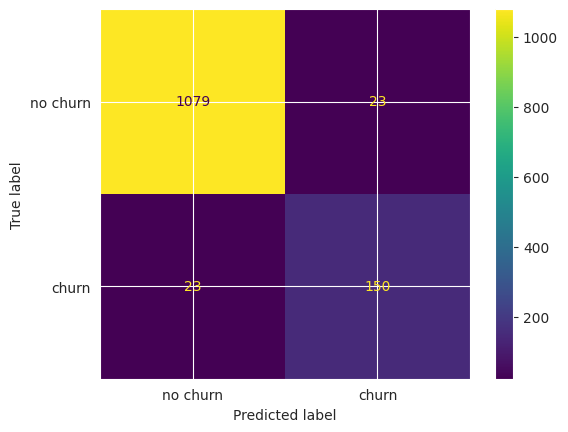

In [45]:
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier()
DTC.fit(X_train, y_train)
y_pred = DTC.predict(X_test)
evaluation(y_test, y_pred, DTC, 'DecisionTreeClassifier()')

<div id='random-forest'><h3><b>Random Forest</b></h3></div>

Model RandomForestClassifier()
Accuracy Score: 97.882%
Precision Score: 99.324%
Recall Score: 84.971%
F1 Score: 91.589%
cross_val_score: 97.388% (0.669%)
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1102
           1       0.99      0.85      0.92       173

    accuracy                           0.98      1275
   macro avg       0.99      0.92      0.95      1275
weighted avg       0.98      0.98      0.98      1275



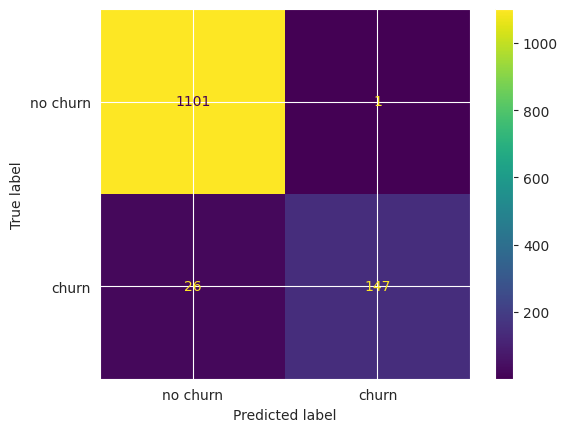

In [46]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()
RF.fit(X_train, y_train)
y_pred = RF.predict(X_test)
evaluation(y_test, y_pred, RF, 'RandomForestClassifier()')

<div id='support-vector-machines'><h3><b>Support Vector Machines</b></h3></div>

Model SVC()
Accuracy Score: 92.314%
Precision Score: 91.209%
Recall Score: 47.977%
F1 Score: 62.879%
cross_val_score: 92.659% (1.077%)
              precision    recall  f1-score   support

           0       0.92      0.99      0.96      1102
           1       0.91      0.48      0.63       173

    accuracy                           0.92      1275
   macro avg       0.92      0.74      0.79      1275
weighted avg       0.92      0.92      0.91      1275



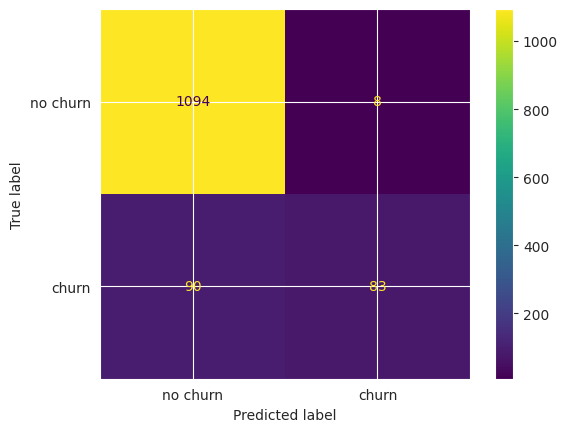

In [47]:
from sklearn.svm import SVC
SVM = SVC()
SVM.fit(X_train, y_train)
y_pred = SVM.predict(X_test)
evaluation(y_test, y_pred, SVM, 'SVC()')

---
<div id='result'><h1><b>Result</b></h1></div>

[<h5>back to contents</h5>](#table-of-content)

In [48]:
ml_df = model_list.sort_values(by='accuracy', ascending=False).reset_index(drop=True)
ml_df

,model_ml,accuracy,recall,precision,f1_score,cross_val_score,std
0,RandomForestClassifier(),97.882353,84.971098,99.324324,91.588785,97.388235,0.669245
1,DecisionTreeClassifier(),96.392157,86.705202,86.705202,86.705202,95.082353,0.838189
2,KNeighborsClassifier(),92.549020,56.647399,83.050847,67.353952,92.611765,0.906417
3,SVC(),92.313725,47.976879,91.208791,62.878788,92.658824,1.077226
4,LogisticRegression(),88.078431,17.919075,75.609756,28.971963,87.176471,1.462803


From this result **Random Forest** become best model with largest accuarcy and precision

In [49]:
# Save the best machine learning model into pickle

import pickle
RF = RandomForestClassifier()
forest = RF.fit(X_train, y_train)

pickle.dump(forest, open('forest.pkl', 'wb'))

---
<div id='model-interpretation'><h1><b>Model Interpretation</b></h1></div>

[<h5>back to contents</h5>](#table-of-content)

In [50]:
data_test = pd.read_csv("/kaggle/input/customer-churn-prediction-2020/test.csv")
data_test.head()

,id,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,2,AL,118,area_code_510,yes,no,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0
2,3,IA,62,area_code_415,no,no,0,120.7,70,20.52,307.2,76,26.11,203.0,99,9.14,13.1,6,3.54,4
3,4,VT,93,area_code_510,no,no,0,190.7,114,32.42,218.2,111,18.55,129.6,121,5.83,8.1,3,2.19,3
4,5,NE,174,area_code_415,no,no,0,124.3,76,21.13,277.1,112,23.55,250.7,115,11.28,15.5,5,4.19,3


In [51]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             750 non-null    int64  
 1   state                          750 non-null    object 
 2   account_length                 750 non-null    int64  
 3   area_code                      750 non-null    object 
 4   international_plan             750 non-null    object 
 5   voice_mail_plan                750 non-null    object 
 6   number_vmail_messages          750 non-null    int64  
 7   total_day_minutes              750 non-null    float64
 8   total_day_calls                750 non-null    int64  
 9   total_day_charge               750 non-null    float64
 10  total_eve_minutes              750 non-null    float64
 11  total_eve_calls                750 non-null    int64  
 12  total_eve_charge               750 non-null    flo

In [52]:
# Create preprocessing functions for testing data

def preprocess(data):
  data = data.iloc[:, 4:]
  data['total_minutes'] = data['total_day_minutes'] + data['total_eve_minutes'] + data['total_night_minutes']
  data['total_calls'] = data['total_day_calls'] + data['total_eve_calls'] + data['total_night_calls']
  data['total_charge'] = data['total_day_charge'] + data['total_eve_charge'] + data['total_night_charge']

  data['international_plan'] = data['international_plan'].map({'yes': 1, 'no': 0})
  data['voice_mail_plan'] = data['voice_mail_plan'].map({'yes': 1, 'no': 0})

  data['number_vmail_messages'] = MinMaxScaler().fit_transform(data['number_vmail_messages'].values.reshape(len(data), 1))
  data['total_intl_minutes'] = MinMaxScaler().fit_transform(data['total_intl_minutes'].values.reshape(len(data), 1))
  data['total_intl_charge'] = MinMaxScaler().fit_transform(data['total_intl_charge'].values.reshape(len(data), 1))
  data['total_intl_calls'] = MinMaxScaler().fit_transform(data['total_intl_calls'].values.reshape(len(data), 1))
  data['number_customer_service_calls'] = MinMaxScaler().fit_transform(data['number_customer_service_calls'].values.reshape(len(data), 1))
  data['total_minutes'] = MinMaxScaler().fit_transform(data['total_minutes'].values.reshape(len(data), 1))
  data['total_calls'] = MinMaxScaler().fit_transform(data['total_calls'].values.reshape(len(data), 1))
  data['total_charge'] = MinMaxScaler().fit_transform(data['total_charge'].values.reshape(len(data), 1))

  X = ['total_day_minutes'
                        , 'total_eve_minutes'
                        , 'total_night_minutes'
                        , 'total_day_calls'
                        , 'total_eve_calls'
                        , 'total_night_calls'
                        , 'total_day_charge'
                        , 'total_eve_charge'
                        , 'total_night_charge'
                        ]
  return data.drop(columns=X)

In [53]:
# Best model interpretation

X_data_test = preprocess(data_test)
forest_model = pickle.load(open('./forest.pkl', 'rb'))
churn = forest_model.predict(X_data_test)
data_test['churn'] = churn
data_test['churn'] = data_test['churn'].map({1: 'yes', 0: 'no'})
data_test.head()

,id,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,no
1,2,AL,118,area_code_510,yes,no,0,223.4,98,37.98,...,101,18.75,203.9,118,9.18,6.3,6,1.70,0,no
2,3,IA,62,area_code_415,no,no,0,120.7,70,20.52,...,76,26.11,203.0,99,9.14,13.1,6,3.54,4,no
3,4,VT,93,area_code_510,no,no,0,190.7,114,32.42,...,111,18.55,129.6,121,5.83,8.1,3,2.19,3,no
4,5,NE,174,area_code_415,no,no,0,124.3,76,21.13,...,112,23.55,250.7,115,11.28,15.5,5,4.19,3,yes


In [54]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             750 non-null    int64  
 1   state                          750 non-null    object 
 2   account_length                 750 non-null    int64  
 3   area_code                      750 non-null    object 
 4   international_plan             750 non-null    object 
 5   voice_mail_plan                750 non-null    object 
 6   number_vmail_messages          750 non-null    int64  
 7   total_day_minutes              750 non-null    float64
 8   total_day_calls                750 non-null    int64  
 9   total_day_charge               750 non-null    float64
 10  total_eve_minutes              750 non-null    float64
 11  total_eve_calls                750 non-null    int64  
 12  total_eve_charge               750 non-null    flo

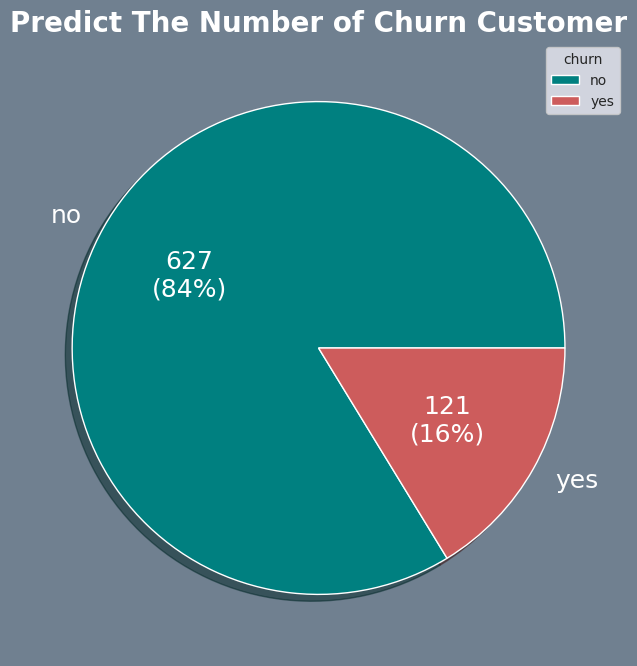

In [55]:
plt.figure(figsize=(10,8), facecolor='slategray')
churn = data_test['churn'].value_counts()
colors = ['teal', 'indianred']
sns.set_style('darkgrid')
plt.pie(churn, labels=churn.index, autopct=lambda pct: pie_label(pct, churn), colors=colors, shadow=True, textprops=dict(color='white', fontsize=18))
plt.title("Predict The Number of Churn Customer", color='white', loc='center', weight='bold', fontsize=20)
plt.legend(title='churn', loc='upper right', fontsize=10)
plt.show()

---
<div id='submission'><h1><b>Submission</b></h1></div>

[<h5>back to contents</h5>](#table-of-content)

In [56]:
submission = data_test[['id', 'churn']]
submission.to_csv('submission.csv', index=False)
submission.head(10)

,id,churn
0,1,no
1,2,no
2,3,no
3,4,no
4,5,yes
5,6,yes
6,7,no
7,8,no
8,9,no
9,10,no


---
<div id='conclusion'><h1><b>Conclusion</b></h1></div>

[<h5>back to contents</h5>](#table-of-content)

Only 14% of customers churns from overall data customer internet provider's which is affected by several factor, that is :
- From 396 customers which have `international_plan` is churn with percentage 42%.
- Customer who don't have `voice_mail_plan` (no) have large percentage churn in 16.4% from 3138 users.
- The distribution of customers with a call duration of more than 316 minutes per day has a high charge of more than 54.0 which identifies the relationship between the greater the daily call charge, the more customer churn.
- `international_plan` should be able to help customers in reduce `total_international_charge` with affordable prices, but in actually many customers who use international calls is churn. The percentage of customers who churn for those who have an `international_plan` (yes) is very high, especially for customers with `total_intl_calls` less than 8 per day. This is caused by apart from the costs/charge which quite high and another factor is come from customer's needs, there are not too many international calls per day.
- 16% from 3138 customers who do not have `number_vmail_messages` is churn. while for customers who have `voice_mail_plan` (yes) the `number_vmail_message` data is distributed normal with an average `number_vmail_messages` in 30 voice messages per day and the percentage of customers who churn is also much lower.
- The percentage of customers who churn is related with increase `number_customer_service_calls`. Especially for customer with `number_customer_service_calls` more than 8, which indicates that the customer is experiencing a lot of problems either in terms of features or costs from the provider or the problem cannot be resolved so the customer is churns.

---
<div id='recommendation'><h1><b>Recommendation</b></h1></div>

[<h5>back to contents</h5>](#table-of-content)

After predicting which customers will be churn, to prevent this from happening or reducing customer churn there are several recommendations that can be made:
- Classify customers who are predicted to churn by assigning labels to prioritize.
- Providing a subscription promo for daily calling plan of 3 hours (180 minutes) and 6 hours (360 minutes) with charges of 30.0 and 50.0 (you can discuss with business team).
- Create a comprehensive plan for a voice message feature that can be utilized by all customers. Implement 7 day trial period to ensure customers are informed and encouraged to engage with the voice message functionality.
- Update the international plan, particularly for customers who do not frequently make international calls (less than 8 times per day).
- Improve the quality of customer service, both in terms of services and features/products, as well as provider connections/signals, in order to maintain customer satisfaction.
- Please distribute satisfaction surveys to customers regarding the services or products received to obtain comprehensive feedback and identify areas for improvement.
- Monitoring implementation results to observe changes in trends that occur. 